In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [ ]:
ruta_base = '/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/'
df_books = pd.read_csv(ruta_base + 'Books.csv', delimiter=';')
df_ratings = pd.read_csv(ruta_base + 'Ratings.csv', delimiter=';')
df_users = pd.read_csv(ruta_base + 'Users.csv', delimiter=';')

<ipython-input-3-fb20fae3e652>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv(ruta_base + 'Users.csv', delimiter=';')


# 1.1

In [ ]:
df_books.tail(2)

,ISBN,Title,Author,Year,Publisher
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


In [ ]:
df_ratings.tail(2)

,User-ID,ISBN,Rating
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [ ]:
df_users.tail(2)

,User-ID,Age
278857,278857,NaN
278858,278858,NaN


In [ ]:
print(df_books.columns)
print(df_ratings.columns)
print(df_users.columns)

Index(['ISBN', 'Title', 'Author', 'Year', 'Publisher'], dtype='object')
Index(['User-ID', 'ISBN', 'Rating'], dtype='object')
Index(['User-ID', 'Age'], dtype='object')


In [ ]:
df_books['Title'].nunique()

242154

In [ ]:
df_books['Author'].nunique()

102029

In [ ]:
df_books['Publisher'].nunique()

16910

In [ ]:
df_users['User-ID'].nunique()

278859

In [ ]:
df_ratings['User-ID'].nunique()

105283

In [ ]:
df_ratings['Rating'].value_counts()

Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

## Valores incorrectos Year

In [ ]:
df_books['Year'].isna().sum()

0

In [ ]:
# Convert 'Year' column to integers, treating non-convertible values as NaN
integer_years = pd.to_numeric(df_books['Year'], errors='coerce', downcast='integer')

# Count the non-integer values in the 'Year' column
(df_books['Year'] != integer_years).sum()

0

In [ ]:
df_books['Year'].min()

0

In [ ]:
(df_books['Year'] == 0).sum()

4619

In [ ]:
(df_books['Year'] < 100).sum()

4619

In [ ]:
(df_books['Year'] < 1000).sum()

4619

In [ ]:
((df_books['Year'] < 1455) & (df_books['Year'] > 0)).sum()

2

In [ ]:
(df_books['Year'] < 1455).sum()

4621

In [ ]:
(df_books['Year'] < 1970).sum()

7308

In [ ]:
(df_books['Year'] > 2024).sum()

12

In [ ]:
df_books['Year'].max()

2050

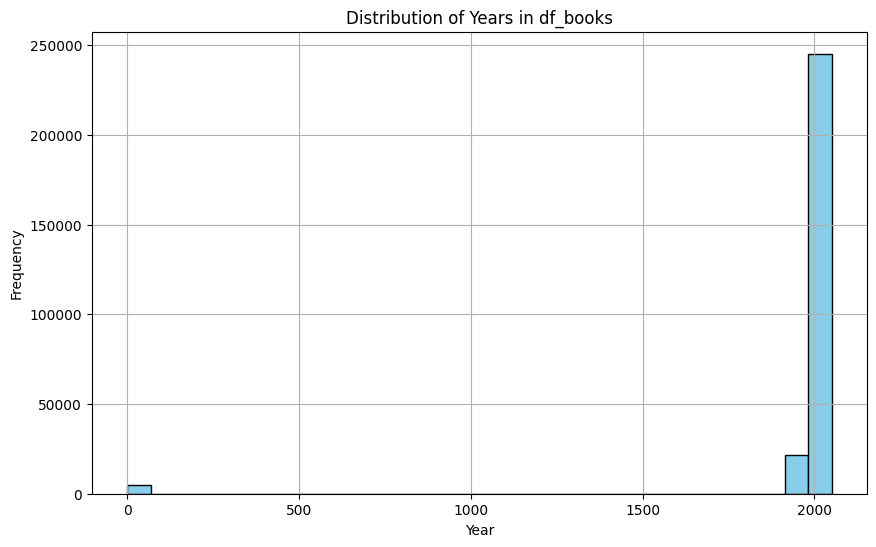

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_books['Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Years in df_books')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

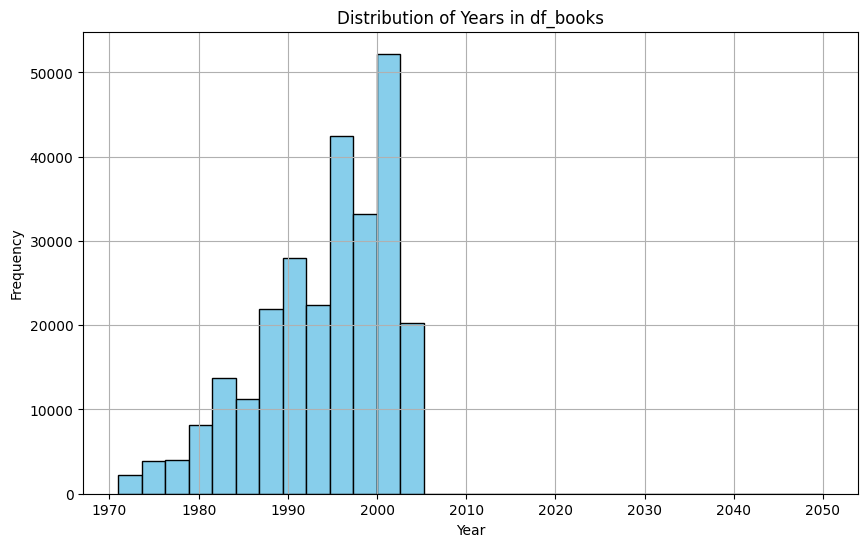

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_books[df_books['Year'] > 1970]['Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Years in df_books')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df_books.tail(1)

,ISBN,Title,Author,Year,Publisher
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


In [ ]:
print(4633/271378)

0.01707212817546006


##Valores incorrectos Age

In [ ]:
df_users['Age'].isna().sum()

110232

In [ ]:
# Convert 'Age' column to integers, treating non-convertible values as NaN
integer_age = pd.to_numeric(df_users['Age'], errors='coerce', downcast='integer')

# Count the non-integer values in the 'Age' column
non_integer_age = (df_users['Age'] != integer_age).sum()

# Print how many non_integer there are
non_integer_age - df_users['Age'].isna().sum()

168627

In [ ]:
# Convert 'Age' column to numeric, treating non-numeric values as NaN
numeric_age = pd.to_numeric(df_users['Age'], errors='coerce')

# Count the non-numeric values in the 'Age' column
non_numeric_age = (df_users['Age'] != numeric_age).sum()

# Print how many non_numeric there are
non_numeric_age - df_users['Age'].isna().sum()

168627

In [ ]:
# Print how many integer there are
numeric_age.notnull().sum()

167151

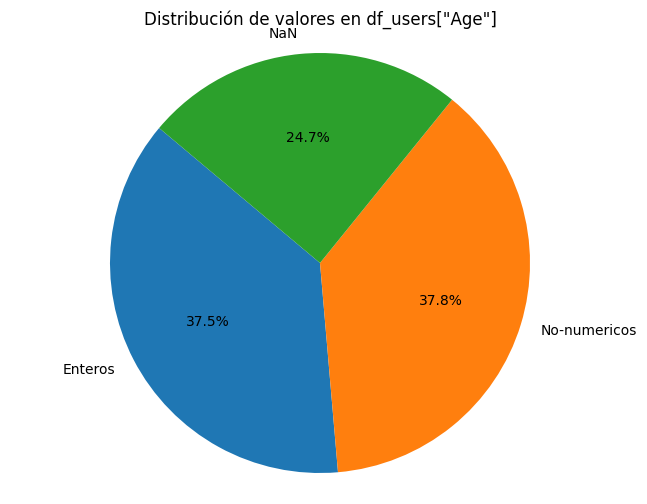

In [ ]:
# Definir los valores y etiquetas
cantidades = [numeric_age.notnull().sum(), non_numeric_age - df_users['Age'].isna().sum(), df_users['Age'].isna().sum()]
etiquetas = ['Enteros', 'No-numericos', 'NaN']

# Crear el pie chart
plt.figure(figsize=(8, 6))
plt.pie(cantidades, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de valores en df_users["Age"]')
plt.show()

In [ ]:
df_users['Age'].unique()

array([nan, '18', '17', '61', '26', '14', '25', '19', '46', '55', '32',
       '24', '20', '34', '23', '51', '31', '21', '44', '30', '57', '43',
       '37', '41', '54', '42', '50', '39', '53', '47', '36', '28', '35',
       '13', '58', '49', '38', '45', '62', '63', '27', '33', '29', '66',
       '40', '15', '60', '0', '79', '22', '16', '65', '59', '48', '72',
       '56', '67', '1', '80', '52', '69', ' canada', '71', ' usa', '73',
       ' chile', '78', '9', '64', '103', '104', '12', '74', ' egypt',
       '75', '231', ' united kingdom', '3', '76', ' the', ' spain', '83',
       '68', ' austria', '119', '11', ' pakistan', '2', ' india', '70',
       '77', '93', ' mexico', ' costa rica', ' yugoslavia', ' honduras',
       ' netherlands', ' new zealand', '8', '7', ' city', ' bas rhin',
       ' australia', '4', '81', '114', '230', '239', ' italy', '10',
       ' germany', '5', ' panama', '148', ' china', ' british columbia',
       '151', '6', ' south africa', '101', ' afghanistan', '20

In [ ]:
(integer_age>100).sum()

364

In [ ]:
(integer_age>111).sum()

95

In [ ]:
(integer_age==0).sum()

412

In [ ]:
((integer_age<5).sum()) - ((integer_age==0).sum())

458

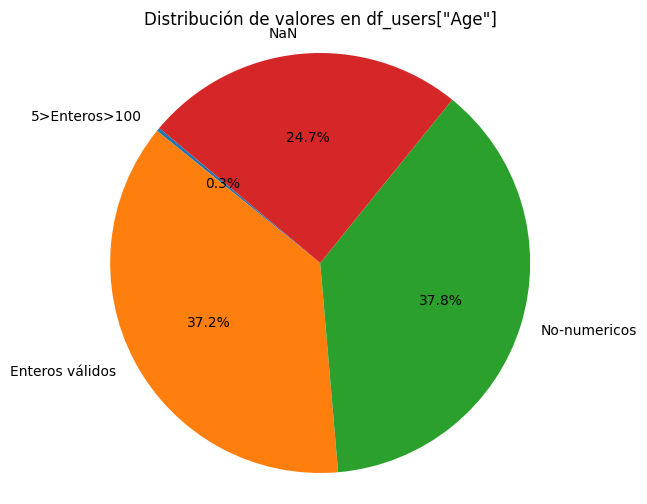

In [ ]:
# Definir los valores y etiquetas
cantidades = [(integer_age>100).sum()+((integer_age<5).sum()),numeric_age.notnull().sum()-((integer_age<5).sum())-(integer_age>100).sum(), non_numeric_age - df_users['Age'].isna().sum(), df_users['Age'].isna().sum()]
etiquetas = ['5>Enteros>100','Enteros válidos', 'No-numericos', 'NaN']

# Crear el pie chart
plt.figure(figsize=(8, 6))
plt.pie(cantidades, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de valores en df_users["Age"]')
plt.show()

## Incorrectos en User-ID

In [ ]:
df_ratings['User-ID'].isna().sum()

0

In [ ]:
df_users['User-ID'].isna().sum()

0

In [ ]:
# Contar cuántos df_ratings['User-ID'] no están presentes en df_users['User-ID']
df_ratings[~df_ratings['User-ID'].isin(df_users['User-ID'])]['User-ID'].nunique()

6230

## Incorrectos ISBN

In [ ]:
df_books['ISBN'].isna().sum()

0

In [ ]:
import re

# Expresión regular para validar el formato de ISBN de 10 dígitos o 13 dígitos
isbn_pattern = r'^\d{9}[\dXx]$|^\d{13}$'

# Crear una máscara booleana para valores de ISBN que no siguen el formato adecuado
incorrect_isbn_mask = ~df_books['ISBN'].astype(str).str.match(isbn_pattern, na=False)

# Obtener los valores incorrectos de ISBN
incorrect_isbn_values = df_books.loc[incorrect_isbn_mask, 'ISBN'].unique()

# Cantidad de valores incorrectos de ISBN
len(incorrect_isbn_values)

117

## Incorrectos rating

In [ ]:
df_ratings['Rating'].isna().sum()

0

In [ ]:
df_ratings['Rating'].value_counts()

Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

#1.2

In [ ]:
df_books = pd.read_csv(ruta_base + 'Books.csv', delimiter=';')
df_newbooks = pd.read_csv(ruta_base + 'all_books.csv', delimiter=',')

In [ ]:
df_books.tail(2)

,ISBN,Title,Author,Year,Publisher
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages


In [ ]:
df_newbooks.tail(2)

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_settings,book_characters,book_language,year_first_published,authorlink,...,num_pages,format,genres,people_curr_read,peop_want_to_read,num_ratings,num_reviews,average_rating,rating_distribution,awards
1477,18090118-hotelles,18090118,https://images-na.ssl-images-amazon.com/images...,Hotelles,['La trilogie Hotel'],NaN,NaN,English,2013.0,https://www.goodreads.com/author/show/7127295....,...,586.0,Paperback,"['Romance', 'Erotica', 'Erotic Romance', 'Cont...",37,836,584,101,2.97,"{'5 Stars': 71, '4 Stars': 116, '3 Stars': 200...",[]
1478,24350893-the-next-sin,24350893,https://images-na.ssl-images-amazon.com/images...,The Next Sin,['The Sin Trilogy'],NaN,NaN,English,2015.0,https://www.goodreads.com/author/show/5228869....,...,228.0,Kindle Edition,"['Romance', 'Contemporary Romance', 'Romantic ...",618,991,5128,405,4.24,"{'5 Stars': 2305, '4 Stars': 1959, '3 Stars': ...",[]


In [ ]:
columns_books = set(df_books.columns)
columns_newbooks = set(df_newbooks.columns)

# Comprobar si todas las columnas de df_books están en df_newbooks
if columns_books.issubset(columns_newbooks):
    print("Todas las columnas de df_books están en df_newbooks.")
else:
    print("No todas las columnas de df_books están en df_newbooks.")
    missing_columns = columns_books - columns_newbooks
    print("Columnas ausentes en df_newbooks:")
    for column in missing_columns:
      print(column)

No todas las columnas de df_books están en df_newbooks.
Columnas ausentes en df_newbooks:
ISBN
Title
Author
Year
Publisher


In [ ]:
print(list(columns_books))

['ISBN', 'Title', 'Author', 'Year', 'Publisher']


In [ ]:
for column in columns_newbooks:
      print(column)

book_id_title
peop_want_to_read
genres
num_pages
authorlink
book_characters
book_settings
average_rating
num_ratings
book_id
awards
book_title
rating_distribution
cover_image_uri
book_series
format
people_curr_read
year_first_published
author
book_language
num_reviews


In [ ]:
df_newbooks.rename(columns={'year_first_published': 'Year', 'book_title': 'Title', 'author': 'Author', 'book_id': 'ISBN'}, inplace=True)

In [ ]:
df_allbooks = pd.concat([df_books, df_newbooks], ignore_index=True)
df_allbooks_fit.drop(columns=set(df_newbooks.columns) - set(df_books.columns), inplace=True)

In [ ]:
df_allbooks.head(2)

# 2.1

In [ ]:
df_books['Year'].mode()

0    2002
Name: Year, dtype: int64

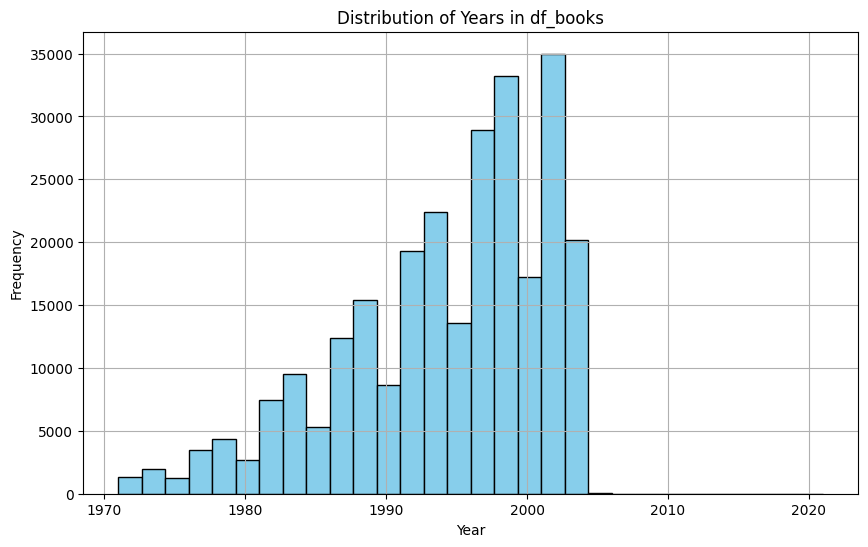

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_books[(df_books['Year'] > 1970) & (df_books['Year'] < 2024)]['Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Years in df_books')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

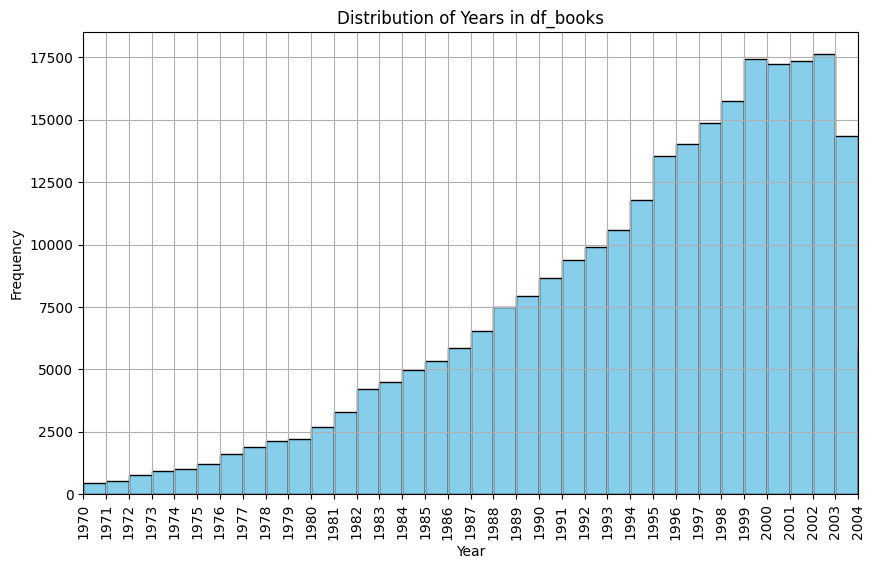

In [ ]:
filtered_years = df_books[(df_books['Year'] >= 1970) & (df_books['Year'] <= 2004)]['Year']

# Crear el histograma con bins de 1 años
plt.figure(figsize=(10, 6))
plt.hist(filtered_years, bins=range(1970, 2006, 1), color='skyblue', edgecolor='black')
plt.xlim(1970, 2004)
plt.xticks(range(1970, 2005, 1),rotation=90)
plt.title('Distribution of Years in df_books')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df_books['Author'].mode()

0    Agatha Christie
Name: Author, dtype: object

In [ ]:
(df_books['Author']=='Agatha Christie').value_counts()

Author
False    270747
True        632
Name: count, dtype: int64

In [ ]:
df_books['Author'].nunique()

102029

# 2.2 geography

In [ ]:
# Intentar convertir la columna 'Age' a números y obtener los valores NaN
age_numeric = pd.to_numeric(df_users['Age'], errors='coerce')

# Filtrar los orígenes geográficos de los reseñadores (los datos que son strings)
geography = df_users[age_numeric.isna()]

# Cambiar el nombre de la columna 'Age' a 'Country'
geography.rename(columns={'Age': 'Country'}, inplace=True)

<ipython-input-145-db1cd20ee109>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geography.rename(columns={'Age': 'Country'}, inplace=True)


In [ ]:
geography['Country'].isna().sum()

110232

In [ ]:
geography.dropna(subset=['Country'], inplace=True)

<ipython-input-147-d4a015ece1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geography.dropna(subset=['Country'], inplace=True)


In [ ]:
# Contar los valores únicos en la columna 'Country'
geography['Country'].value_counts()

Country
 usa               518
 united kingdom    246
 canada             96
 australia          61
 spain              58
                  ... 
 cape verde          1
 georgia             1
 algeria             1
 rhode island        1
cavite               1
Name: count, Length: 147, dtype: int64

In [ ]:
geography['Country'].nunique()

147

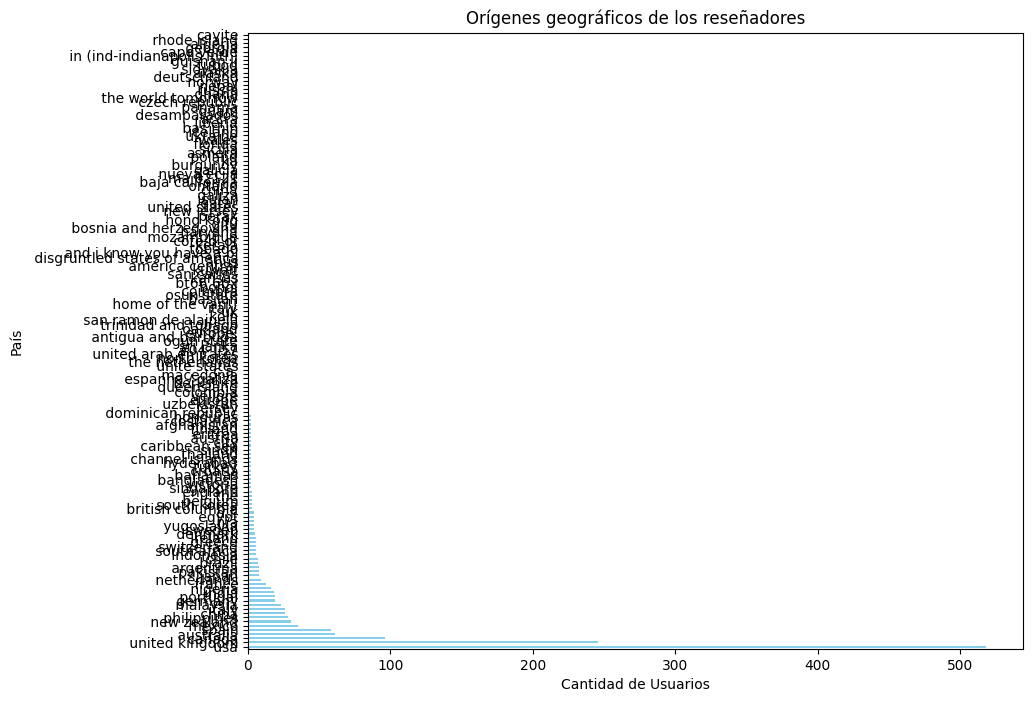

In [ ]:
geography['Country'].value_counts().plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Orígenes geográficos de los reseñadores')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('País')
plt.show()

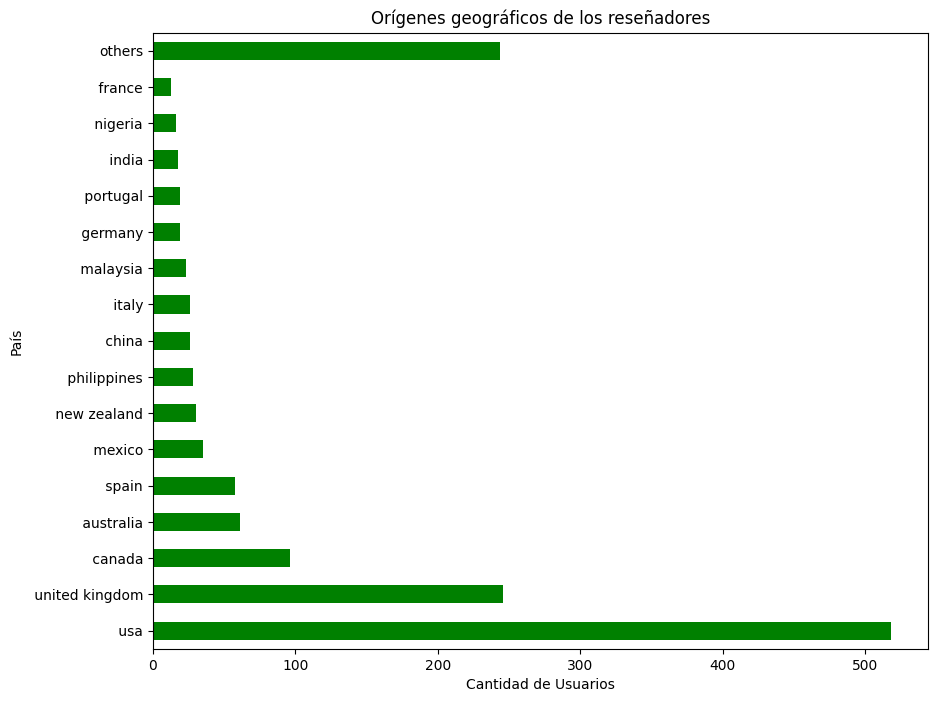

In [ ]:
country_counts = geography['Country'].value_counts() # País - Cantidad de usuarios de ese país
filtered_countries = country_counts[country_counts > 10] # Filtramos los países con como mínimo más de 10 usuarios
other_count = country_counts[country_counts < 10].sum() # Sumamos los países que tienen menos de 10 usuarios
final_data = pd.concat([filtered_countries, pd.Series({'others': other_count})]) # Unimos los datos de Others

final_data.plot(kind='barh', figsize=(10, 8), color='green')
plt.title('Orígenes geográficos de los reseñadores')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('País')
plt.show()

In [ ]:
country_counts[country_counts < 10]

Country
 netherlands     9
 japan           8
 pakistan        8
 argentina       8
 brazil          7
                ..
 cape verde      1
 georgia         1
 algeria         1
 rhode island    1
cavite           1
Name: count, Length: 131, dtype: int64

# 2.2 Age

In [ ]:
# Convertir la columna 'Age' a números
df_users['Age'] = pd.to_numeric(df_users['Age'], errors='coerce')

# Filtrar la edad de los reseñadores (enteros entre 5 y 100)
age = df_users[(df_users['Age'].notnull()) & (df_users['Age'] >= 5) & (df_users['Age'] <= 100)]
age['Age'] = age['Age'].astype(int)
age['Age'].value_counts()

<ipython-input-73-e3e0f9107900>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['Age'] = age['Age'].astype(int)


Age
24    5651
25    5594
26    5525
23    5433
27    5361
      ... 
97       3
89       2
88       2
98       2
95       1
Name: count, Length: 96, dtype: int64

In [ ]:
age['Age'].isna().sum()

0

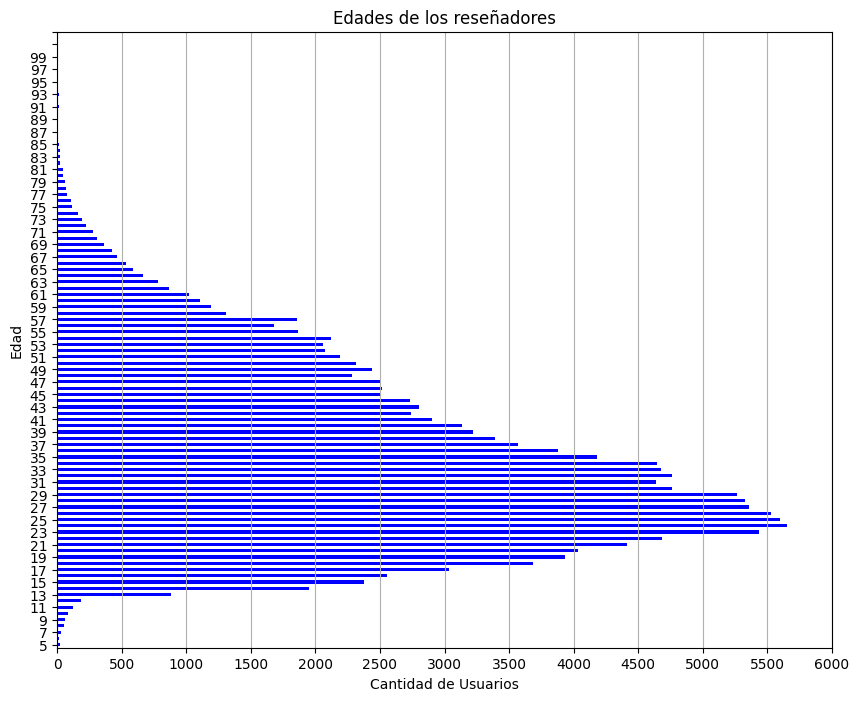

In [ ]:
age['Age'].value_counts().sort_index().plot(kind='barh', figsize=(10, 8), color='blue')
plt.title('Edades de los reseñadores')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Edad')
plt.yticks(range(0, 99, 2))
plt.xticks(range(0, 6001, 500))
plt.grid(axis='x')
plt.show()

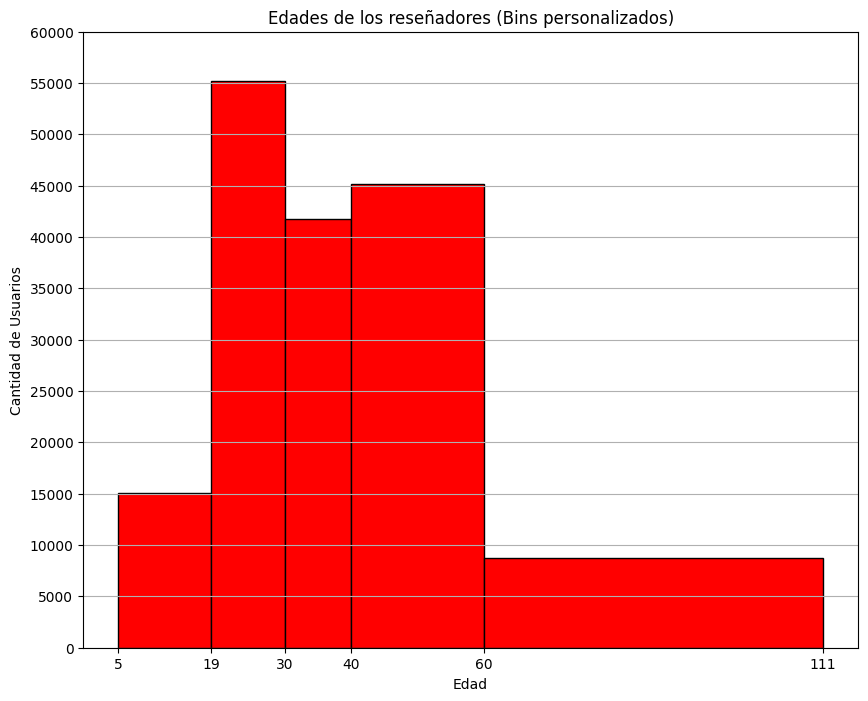

In [ ]:
# Definir los límites de los bins
bins = [5, 19, 30, 40, 60, 111]

# Crear el histograma
plt.figure(figsize=(10, 8))
plt.hist(age['Age'], bins=bins, color='red', edgecolor='black')
plt.title('Edades de los reseñadores (Bins personalizados)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(bins)
plt.yticks(range(0, 60001, 5000))
plt.grid(axis='y')
plt.show()

# 3.1

A partir de los datos que tenemos, se entiende que un libro es exitoso como mayor rating tenga ese libro. Los parámetros que se pueden considerar que influyen en que el rating sea más alto o bajo son:
* Edad → Edad a la que va dirigida el libro. Publicar libros dirigidos para los grupos de edades que puntúan mejor el libro.
* Localización → País al que va dirigido el libro. Publicar libros en los países donde se puntúa mejor el libro.
* Autor → Fomentar la publicación de libros de determinados autores que tienen puntuaciones más altas.


### AGE

In [ ]:
# Convertir la columna 'Age' a números
df_users['Age'] = pd.to_numeric(df_users['Age'], errors='coerce')

# Filtrar la edad de los reseñadores (enteros entre 5 y 100)
age = df_users[(df_users['Age'].notnull()) & (df_users['Age'] >= 5) & (df_users['Age'] <= 100)]
age['Age'] = age['Age'].astype(int)

# Quitar los nans si hubiese
age.dropna(subset=['Age'], inplace=True)

<ipython-input-13-0101c273dedf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['Age'] = age['Age'].astype(int)
<ipython-input-13-0101c273dedf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age.dropna(subset=['Age'], inplace=True)


In [ ]:
age.tail(2)

,User-ID,Age
278853,278853,17
278855,278855,50


In [ ]:
## LEFT JOIN (Los datos de Age se añaden al dataframe de Ratings)
# Unir los dataframes 'ratings' y 'age' usando 'User-ID' como clave de unión
ratings_with_age = pd.merge(df_ratings, age, on='User-ID', how='left')

In [ ]:
ratings_with_age['Age'].value_counts()

Age
29.0    34629
33.0    30339
36.0    29081
30.0    28766
32.0    28698
        ...  
86.0        3
89.0        2
95.0        1
91.0        1
94.0        1
Name: count, Length: 93, dtype: int64

In [ ]:
ratings_with_age['Age'].isna().sum()

364147

In [ ]:
ratings_with_age['Age'].notna().sum()

785633

In [ ]:
ratings_age_cleaned = ratings_with_age.dropna(subset=['Age'])

In [ ]:
ratings_age_cleaned.head(2)

,User-ID,ISBN,Rating,Age
9561,2,0195153448,0,18.0
9584,10,1841721522,0,26.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


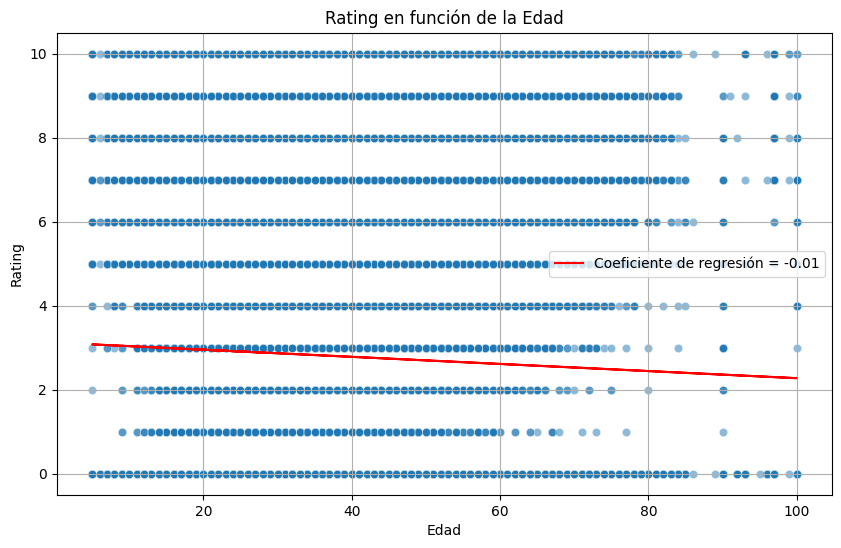

Coeficiente de regresión: -0.01
Valor R-cuadrado: 0.00


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ratings_age_cleaned['Age'], y=ratings_age_cleaned['Rating'], alpha=0.5)
plt.title('Rating en función de la Edad')
plt.xlabel('Edad')
plt.ylabel('Rating')

# Coeficiente de regresión
slope, intercept, r_value, p_value, std_err = linregress(ratings_age_cleaned['Age'], ratings_age_cleaned['Rating'])

# Graficar la línea de regresión
x = ratings_age_cleaned['Age']
plt.plot(x, intercept + slope * x, color='red', label=f'Coeficiente de regresión = {slope:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el coeficiente de regresión
print(f'Coeficiente de regresión: {slope:.2f}')
print(f'Valor R-cuadrado: {r_value**2:.2f}')

<ipython-input-28-f93aafd6577f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_age_cleaned['AgeGroup'] = pd.cut(ratings_age_cleaned['Age'], bins=bins, labels=bin_labels, right=False)


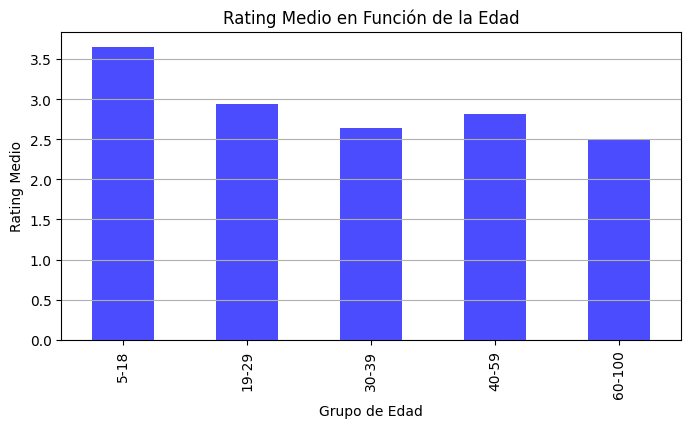

In [ ]:
bins = [5, 19, 30, 40, 60, 100]
bin_labels = ['5-18', '19-29', '30-39', '40-59', '60-100']

# Crear una nueva columna 'AgeGroup' en ratings_left_cleaned para las categorías de edad
ratings_age_cleaned['AgeGroup'] = pd.cut(ratings_age_cleaned['Age'], bins=bins, labels=bin_labels, right=False)

# Calcular el rating medio para cada grupo de edad
age_grouped_ratings = ratings_age_cleaned.groupby('AgeGroup')['Rating'].mean()

# Crear el histograma
plt.figure(figsize=(8, 4))
age_grouped_ratings.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Rating Medio en Función de la Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Rating Medio')
plt.grid(axis='y')
plt.show()

### GEOGRAPHY and AGE

In [ ]:
df_users = pd.read_csv(ruta_base + 'Users.csv', delimiter=';')

<ipython-input-5-146fc1607c6f>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv(ruta_base + 'Users.csv', delimiter=';')


In [ ]:
# Intentar convertir la columna 'Age' a números y obtener los valores NaN
age_numeric = pd.to_numeric(df_users['Age'], errors='coerce')

# Filtrar los orígenes geográficos de los reseñadores (los datos que son strings)
geography = df_users[age_numeric.isna()]

# Cambiar el nombre de la columna 'Age' a 'Country'
geography.rename(columns={'Age': 'Country'}, inplace=True)

<ipython-input-6-db1cd20ee109>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geography.rename(columns={'Age': 'Country'}, inplace=True)


In [ ]:
geography['Country'].isna().sum()

110232

In [ ]:
geography['Country'].notna().sum()

1476

In [ ]:
geography.dropna(subset=['Country'], inplace=True)

<ipython-input-9-d4a015ece1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geography.dropna(subset=['Country'], inplace=True)


In [ ]:
geography['Country'].isna().sum()

0

In [ ]:
geography['Country'].value_counts()

Country
 usa               518
 united kingdom    246
 canada             96
 australia          61
 spain              58
                  ... 
 cape verde          1
 georgia             1
 algeria             1
 rhode island        1
cavite               1
Name: count, Length: 147, dtype: int64

In [ ]:
# Unir el resultado anterior con el dataframe 'ratings_with_age' usando 'User-ID' como clave de unión
ratings_geo = pd.merge(ratings_with_age, geography, on='User-ID', how='left')
print(ratings_geo)

        User-ID         ISBN  Rating  Age Country
0        276725   034545104X       0  NaN     NaN
1        276726   0155061224       5  NaN     NaN
2        276727   0446520802       0  NaN     NaN
3        276729   052165615X       3  NaN     NaN
4        276729   0521795028       6  NaN     NaN
...         ...          ...     ...  ...     ...
1149775  276704   1563526298       9  NaN     NaN
1149776  276706   0679447156       0  NaN     NaN
1149777  276709   0515107662      10  NaN     NaN
1149778  276721   0590442449      10  NaN     NaN
1149779  276723  05162443314       8  NaN     NaN

[1149780 rows x 5 columns]


In [ ]:
ratings_geo['Country'].isna().sum()

1146814

In [ ]:
ratings_geo['Country'].unique()

array([nan, ' usa', ' united kingdom', ' austria', ' new zealand',
       ' canada', ' italy', ' british columbia', ' mexico',
       ' deutschland', ' philippines', ' spain', ' australia', ' india',
       ' iceland', ' germany', ' united states', ' finland', ' china',
       ' portugal', ' france', ' netherlands', ' channel islands', ' the',
       ' gifu', ' ontario', ' galiza', ' switzerland', ' singapore',
       ' malaysia', ' rhode island', ' georgia', ' cape verde',
       ' south korea', 'guishan li', ' denmark', ' the world tomorrow',
       ' sweden', ' ireland', ' guam', ' chile', ' honduras', ' england',
       ' the netherlands', ' south africa', ' c.a.', ' japan',
       ' espanha / galiza', ' nigeria', ' jersey', ' kansas', ' greece',
       ' tobago', ' afghanistan', ' disgruntled states of america',
       ' d.f.'], dtype=object)

In [ ]:
## MODIFICAR NOMBRES DE PAÍSES QUE NO SON IGUALES
import re
# Eliminar las filas con valores NaN en la columna 'Country'
ratings_geo_cleaned = ratings_geo.dropna(subset=['Country'])

# Convertir la columna 'Country' a cadenas de texto
ratings_geo_cleaned['Country'] = ratings_geo_cleaned['Country'].astype(str)

# Definir el diccionario de mapeo para los nombres de los países
mapping = {
    'british columbia': 'canada',
    'channel islands': 'united kingdom',
    'jersey': 'united kingdom',
    'england': 'united kingdom',
    'united states': 'usa',
    'kansas': 'usa',
    'espanha / galiza': 'spain',
    'galiza': 'spain',
    'rhode island': 'usa',
    'disgruntled states of america': 'usa',
    'deutschland': 'germany',
    'the netherlands': 'netherlands',
    'ontario': 'canada',
    'guam': 'usa',
    'gifu': 'japan'}

# Convertir las claves del diccionario de mapeo a una expresión regular para buscar coincidencias parciales
pattern = '|'.join(map(re.escape, mapping.keys()))

# Buscar coincidencias parciales en los nombres de los países en la columna 'Country'
matches = ratings_geo_cleaned['Country'].str.contains(pattern, case=False)

# Aplicar el mapeo solo a las filas con coincidencias parciales y actualizar la columna 'Country'
ratings_geo_cleaned.loc[matches, 'Country'] = ratings_geo_cleaned.loc[matches, 'Country'].replace(mapping, regex=True)

ratings_geo_cleaned['Country'].value_counts()

<ipython-input-31-0223846f203f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_geo_cleaned['Country'] = ratings_geo_cleaned['Country'].astype(str)


Country
 usa                   1164
 united kingdom         828
 georgia                249
 spain                  229
 canada                 105
 japan                  101
 australia               53
 malaysia                41
 italy                   24
 new zealand             21
 mexico                  20
 south korea             15
 iceland                 14
 portugal                14
 tobago                  12
 germany                  9
 ireland                  9
 france                   9
 philippines              7
 cape verde               5
 switzerland              5
 austria                  5
 china                    4
 singapore                3
 netherlands              3
 denmark                  2
 sweden                   2
 south africa             1
 afghanistan              1
 greece                   1
 nigeria                  1
 c.a.                     1
 india                    1
 honduras                 1
 chile                    1
 the        

In [ ]:
ratings_geo_cleaned['Country'].isna().sum()

0

In [ ]:
# Contar la frecuencia de cada valor en la columna 'Country'
country_counts = ratings_geo_cleaned['Country'].value_counts()

# Filtrar para obtener solo los países que aparecen dos o más veces
frequent_countries = country_counts[country_counts >= 2].index

# Filtrar el DataFrame para mantener solo las filas donde 'Country' está en los países frecuentes
ratings_geo_filtered = ratings_geo_cleaned[ratings_geo_cleaned['Country'].isin(frequent_countries)]

# Mostrar el resultado para verificar
print(ratings_geo_filtered['Country'].value_counts())

Country
 usa               1164
 united kingdom     828
 georgia            249
 spain              229
 canada             105
 japan              101
 australia           53
 malaysia            41
 italy               24
 new zealand         21
 mexico              20
 south korea         15
 portugal            14
 iceland             14
 tobago              12
 france               9
 germany              9
 ireland              9
 philippines          7
 switzerland          5
 cape verde           5
 austria              5
 china                4
 netherlands          3
 singapore            3
 denmark              2
 sweden               2
Name: count, dtype: int64


In [ ]:
ratings_geo_cleaned['Country'].unique()

array([' usa', ' united kingdom', ' austria', ' new zealand', ' canada',
       ' italy', ' mexico', ' germany', ' philippines', ' spain',
       ' australia', ' india', ' iceland', ' finland', ' china',
       ' portugal', ' france', ' netherlands', ' the', ' japan',
       ' switzerland', ' singapore', ' malaysia', ' georgia',
       ' cape verde', ' south korea', 'guishan li', ' denmark',
       ' the world tomorrow', ' sweden', ' ireland', ' chile',
       ' honduras', ' south africa', ' c.a.', ' nigeria', ' greece',
       ' tobago', ' afghanistan', ' d.f.'], dtype=object)

In [ ]:
ratings_geo_filtered.tail(2)

,User-ID,ISBN,Rating,Age,Country
1092050,261858,0671899481,7,NaN,new zealand
1092671,262087,1840240679,7,NaN,canada


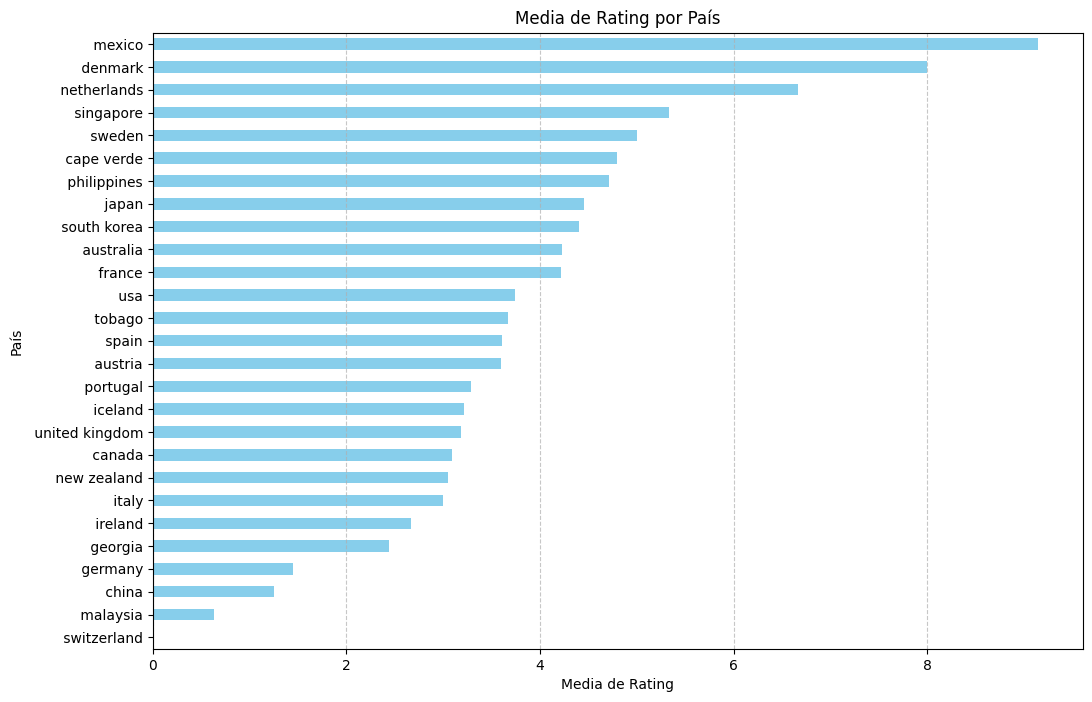

In [ ]:
# Agrupar por 'Country' y calcular la media de 'Rating' para cada país
country_rating_means = ratings_geo_filtered.groupby('Country')['Rating'].mean()

# Ordenar los valores por la media de rating
country_rating_means_sorted = country_rating_means.sort_values()

# Crear diagrama de barras horizontal
plt.figure(figsize=(12, 8))
country_rating_means_sorted.plot(kind='barh', color='skyblue')
plt.title('Media de Rating por País')
plt.xlabel('Media de Rating')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

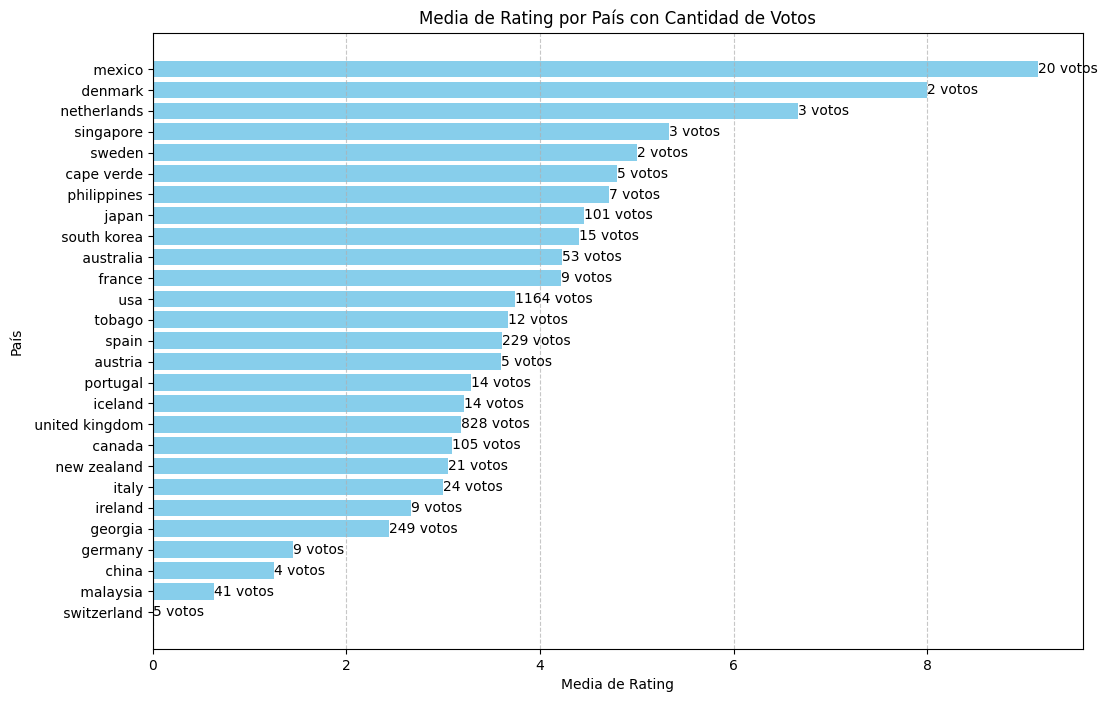

In [ ]:
# Agrupar por 'Country' y calcular la media de 'Rating' y la cantidad de votos para cada país
country_stats = ratings_geo_filtered.groupby('Country')['Rating'].agg(['mean', 'count'])

# Ordenar los valores por la media de rating
country_stats_sorted = country_stats.sort_values(by='mean')

plt.figure(figsize=(12, 8))
bars = plt.barh(country_stats_sorted.index, country_stats_sorted['mean'], color='skyblue')

# Añadir las etiquetas de la cantidad de votos a cada barra
for bar, count in zip(bars, country_stats_sorted['count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} votos', va='center', ha='left')

plt.title('Media de Rating por País con Cantidad de Votos')
plt.xlabel('Media de Rating')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Geography alone

In [ ]:
# Unir el resultado anterior con el dataframe 'ratings' usando 'User-ID' como clave de unión
ratings_geo2 = pd.merge(df_ratings, geography, on='User-ID', how='left')
print(ratings_geo)

        User-ID         ISBN  Rating  Age Country
0        276725   034545104X       0  NaN     NaN
1        276726   0155061224       5  NaN     NaN
2        276727   0446520802       0  NaN     NaN
3        276729   052165615X       3  NaN     NaN
4        276729   0521795028       6  NaN     NaN
...         ...          ...     ...  ...     ...
1149775  276704   1563526298       9  NaN     NaN
1149776  276706   0679447156       0  NaN     NaN
1149777  276709   0515107662      10  NaN     NaN
1149778  276721   0590442449      10  NaN     NaN
1149779  276723  05162443314       8  NaN     NaN

[1149780 rows x 5 columns]


In [ ]:
ratings_geo2['Country'].isna().sum()

1146814

In [ ]:
ratings_geo2['Country'].unique()

array([nan, ' usa', ' united kingdom', ' austria', ' new zealand',
       ' canada', ' italy', ' british columbia', ' mexico',
       ' deutschland', ' philippines', ' spain', ' australia', ' india',
       ' iceland', ' germany', ' united states', ' finland', ' china',
       ' portugal', ' france', ' netherlands', ' channel islands', ' the',
       ' gifu', ' ontario', ' galiza', ' switzerland', ' singapore',
       ' malaysia', ' rhode island', ' georgia', ' cape verde',
       ' south korea', 'guishan li', ' denmark', ' the world tomorrow',
       ' sweden', ' ireland', ' guam', ' chile', ' honduras', ' england',
       ' the netherlands', ' south africa', ' c.a.', ' japan',
       ' espanha / galiza', ' nigeria', ' jersey', ' kansas', ' greece',
       ' tobago', ' afghanistan', ' disgruntled states of america',
       ' d.f.'], dtype=object)

In [ ]:
## MODIFICAR NOMBRES DE PAÍSES QUE NO SON IGUALES
import re
# Eliminar las filas con valores NaN en la columna 'Country'
ratings_geo2_cleaned = ratings_geo.dropna(subset=['Country'])

# Convertir la columna 'Country' a cadenas de texto
ratings_geo2_cleaned['Country'] = ratings_geo2_cleaned['Country'].astype(str)

# Definir el diccionario de mapeo para los nombres de los países
mapping = {
    'british columbia': 'canada',
    'channel islands': 'united kingdom',
    'jersey': 'united kingdom',
    'england': 'united kingdom',
    'united states': 'usa',
    'kansas': 'usa',
    'espanha / galiza': 'spain',
    'galiza': 'spain',
    'rhode island': 'usa',
    'disgruntled states of america': 'usa',
    'deutschland': 'germany',
    'the netherlands': 'netherlands',
    'ontario': 'canada',
    'guam': 'usa',
    'gifu': 'japan'}

# Convertir las claves del diccionario de mapeo a una expresión regular para buscar coincidencias parciales
pattern = '|'.join(map(re.escape, mapping.keys()))

# Buscar coincidencias parciales en los nombres de los países en la columna 'Country'
matches = ratings_geo2_cleaned['Country'].str.contains(pattern, case=False)

# Aplicar el mapeo solo a las filas con coincidencias parciales y actualizar la columna 'Country'
ratings_geo2_cleaned.loc[matches, 'Country'] = ratings_geo2_cleaned.loc[matches, 'Country'].replace(mapping, regex=True)

ratings_geo2_cleaned['Country'].value_counts()

<ipython-input-52-1784ac8b30d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_geo2_cleaned['Country'] = ratings_geo2_cleaned['Country'].astype(str)


Country
 usa                   1164
 united kingdom         828
 georgia                249
 spain                  229
 canada                 105
 japan                  101
 australia               53
 malaysia                41
 italy                   24
 new zealand             21
 mexico                  20
 south korea             15
 iceland                 14
 portugal                14
 tobago                  12
 germany                  9
 ireland                  9
 france                   9
 philippines              7
 cape verde               5
 switzerland              5
 austria                  5
 china                    4
 singapore                3
 netherlands              3
 denmark                  2
 sweden                   2
 south africa             1
 afghanistan              1
 greece                   1
 nigeria                  1
 c.a.                     1
 india                    1
 honduras                 1
 chile                    1
 the        

In [ ]:
ratings_geo2_cleaned['Country'].isna().sum()

0

In [ ]:
# Contar la frecuencia de cada valor en la columna 'Country'
country2_counts = ratings_geo2_cleaned['Country'].value_counts()

# Filtrar para obtener solo los países que aparecen dos o más veces
frequent2_countries = country2_counts[country2_counts >= 2].index

# Filtrar el DataFrame para mantener solo las filas donde 'Country' está en los países frecuentes
ratings_geo2_filtered = ratings_geo2_cleaned[ratings_geo2_cleaned['Country'].isin(frequent2_countries)]

# Mostrar el resultado para verificar
print(ratings_geo2_filtered['Country'].value_counts())

Country
 usa               1164
 united kingdom     828
 georgia            249
 spain              229
 canada             105
 japan              101
 australia           53
 malaysia            41
 italy               24
 new zealand         21
 mexico              20
 south korea         15
 portugal            14
 iceland             14
 tobago              12
 france               9
 germany              9
 ireland              9
 philippines          7
 switzerland          5
 cape verde           5
 austria              5
 china                4
 netherlands          3
 singapore            3
 denmark              2
 sweden               2
Name: count, dtype: int64


In [ ]:
ratings_geo2_cleaned['Country'].unique()

array([' usa', ' united kingdom', ' austria', ' new zealand', ' canada',
       ' italy', ' mexico', ' germany', ' philippines', ' spain',
       ' australia', ' india', ' iceland', ' finland', ' china',
       ' portugal', ' france', ' netherlands', ' the', ' japan',
       ' switzerland', ' singapore', ' malaysia', ' georgia',
       ' cape verde', ' south korea', 'guishan li', ' denmark',
       ' the world tomorrow', ' sweden', ' ireland', ' chile',
       ' honduras', ' south africa', ' c.a.', ' nigeria', ' greece',
       ' tobago', ' afghanistan', ' d.f.'], dtype=object)

In [ ]:
ratings_geo2_filtered.tail(2)

,User-ID,ISBN,Rating,Age,Country
1092050,261858,0671899481,7,NaN,new zealand
1092671,262087,1840240679,7,NaN,canada


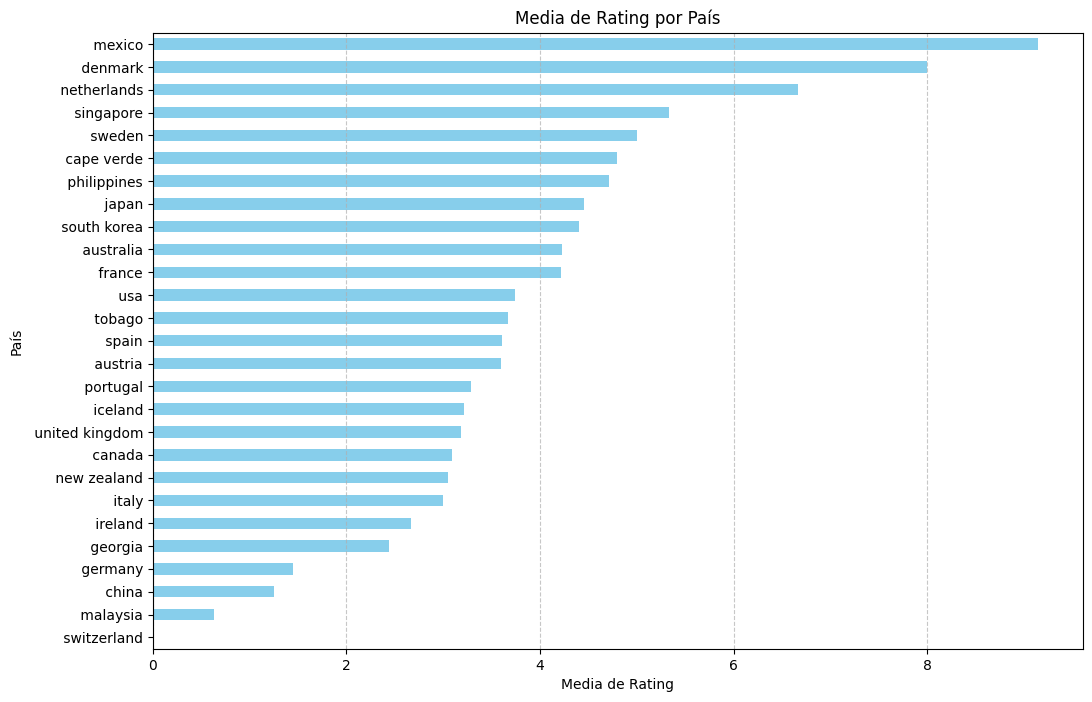

In [ ]:
# Agrupar por 'Country' y calcular la media de 'Rating' para cada país
country2_rating_means = ratings_geo2_filtered.groupby('Country')['Rating'].mean()

# Ordenar los valores por la media de rating
country2_rating_means_sorted = country_rating_means.sort_values()

# Crear diagrama de barras horizontal
plt.figure(figsize=(12, 8))
country2_rating_means_sorted.plot(kind='barh', color='skyblue')
plt.title('Media de Rating por País')
plt.xlabel('Media de Rating')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

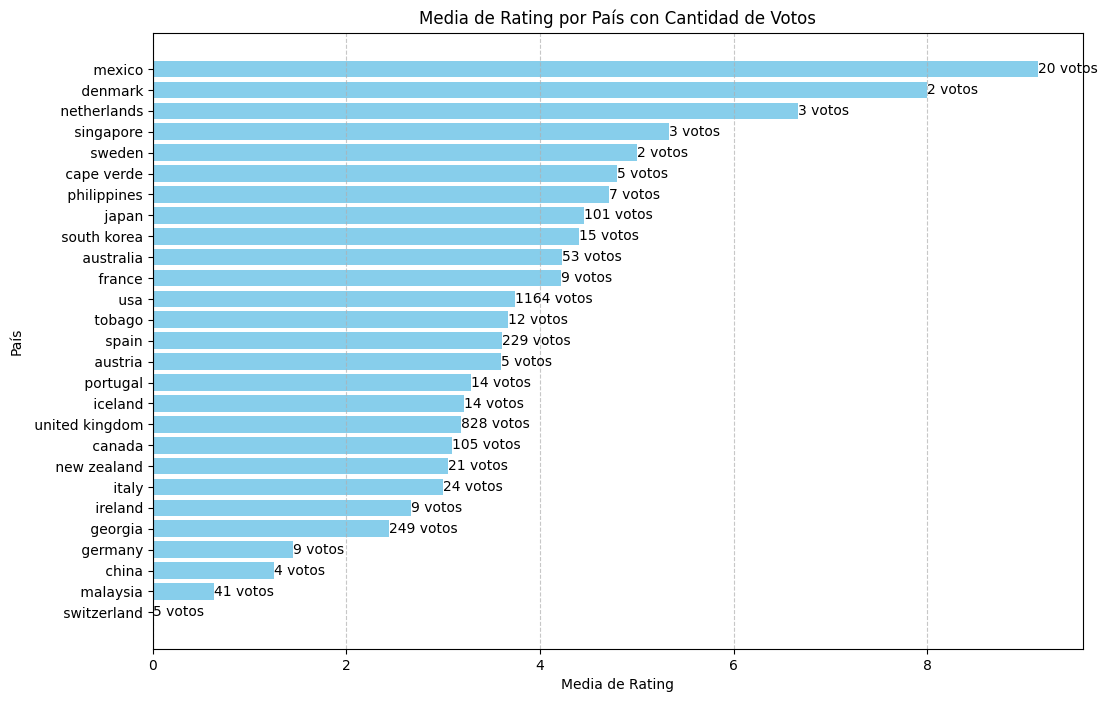

In [ ]:
# Agrupar por 'Country' y calcular la media de 'Rating' y la cantidad de votos para cada país
country2_stats = ratings_geo2_filtered.groupby('Country')['Rating'].agg(['mean', 'count'])

# Ordenar los valores por la media de rating
country2_stats_sorted = country2_stats.sort_values(by='mean')

plt.figure(figsize=(12, 8))
bars = plt.barh(country2_stats_sorted.index, country2_stats_sorted['mean'], color='skyblue')

# Añadir las etiquetas de la cantidad de votos a cada barra
for bar, count in zip(bars, country2_stats_sorted['count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} votos', va='center', ha='left')

plt.title('Media de Rating por País con Cantidad de Votos')
plt.xlabel('Media de Rating')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Autor

In [ ]:
df_ratings.head(2)

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
df_books.head(2)

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [ ]:
# Realizar la unión de dataframes usando la columna 'ISBN' como clave
df_autor = pd.merge(df_books, df_ratings, on='ISBN', how='inner')

In [ ]:
df_autor['Author'].nunique()

101594

In [ ]:
df_autor['Author'].isna().sum()

2

In [ ]:
df_autor.dropna(subset=['Author'])

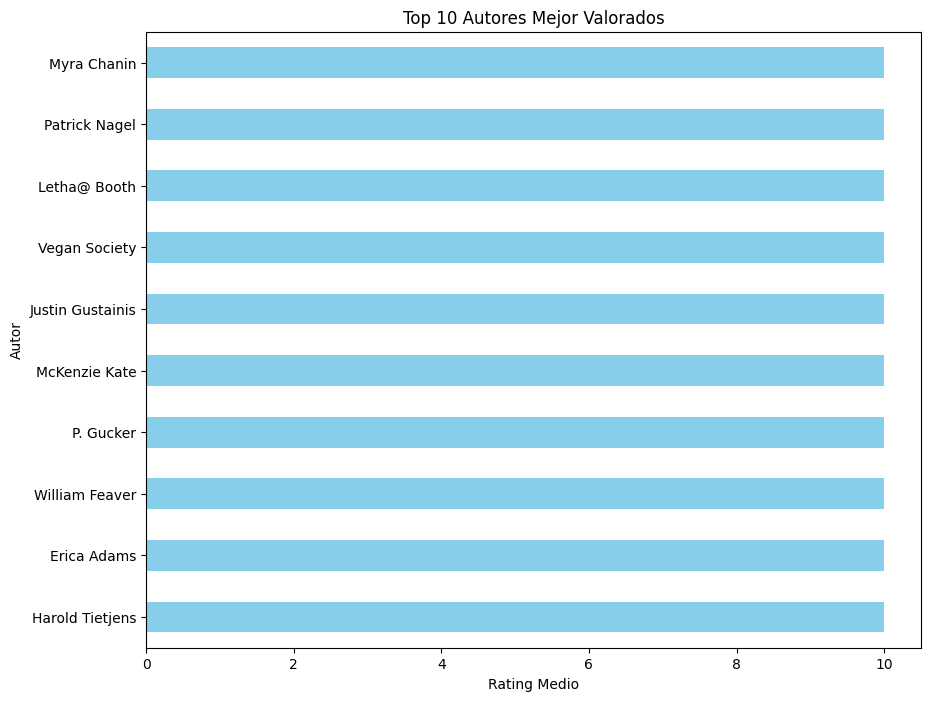

In [ ]:
# Agrupar por 'Author' y calcular la media de 'Rating'
author_ratings = df_autor.groupby('Author')['Rating'].mean()

# Ordenar los resultados por la media de 'Rating'
author_ratings_sorted = author_ratings.sort_values(ascending=False).head(10)

# Crear el diagrama de barras horizontal
plt.figure(figsize=(10, 8))
author_ratings_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Rating Medio')
plt.ylabel('Autor')
plt.title('Top 10 Autores Mejor Valorados')
plt.show()

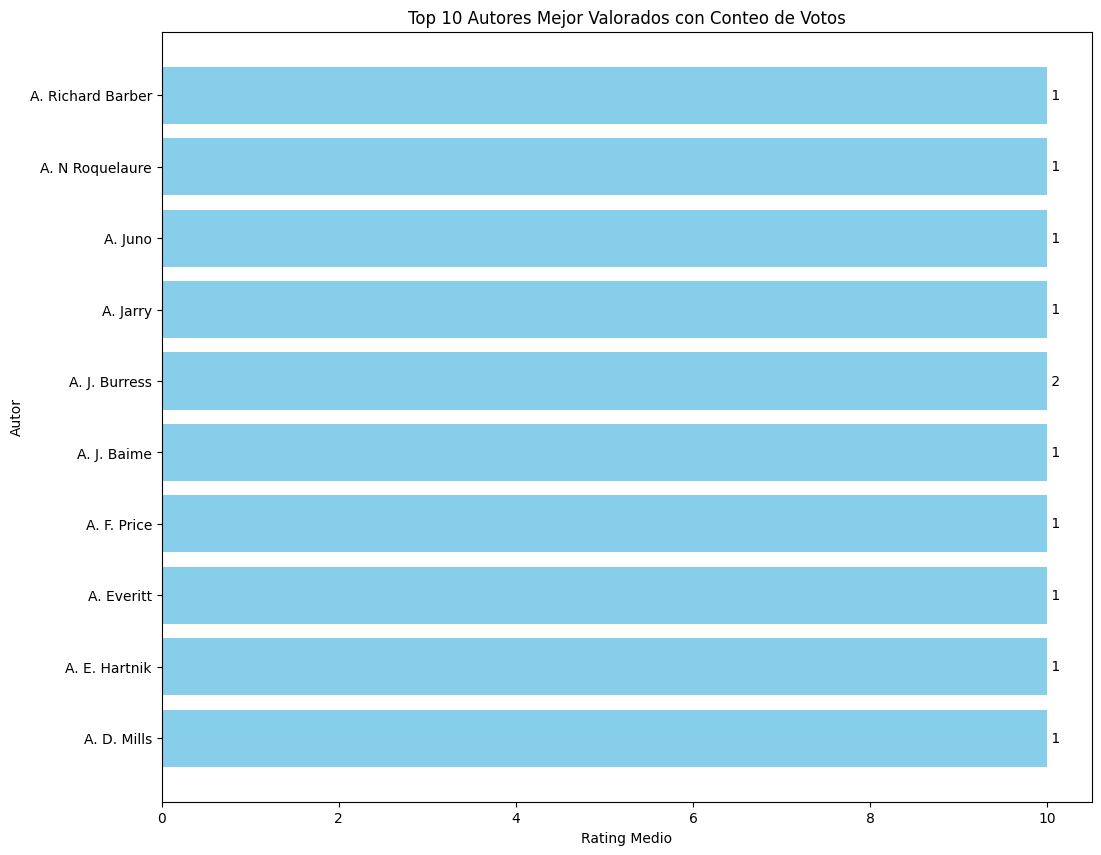

In [ ]:
# Agrupar por 'Author' y calcular la media y el conteo de 'Rating'
author_stats = df_autor.groupby('Author')['Rating'].agg(['mean', 'count'])

# Seleccionar los 10 autores con la media de rating más alta
top_authors = author_stats.nlargest(10, 'mean')

# Crear el diagrama de barras horizontal
plt.figure(figsize=(12, 10))
bars = plt.barh(top_authors.index, top_authors['mean'], color='skyblue')

# Añadir las etiquetas de conteo de votos al gráfico
for bar, count in zip(bars, top_authors['count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f' {count}', va='center', ha='left')

plt.xlabel('Rating Medio')
plt.ylabel('Autor')
plt.title('Top 10 Autores Mejor Valorados con Conteo de Votos')
plt.show()

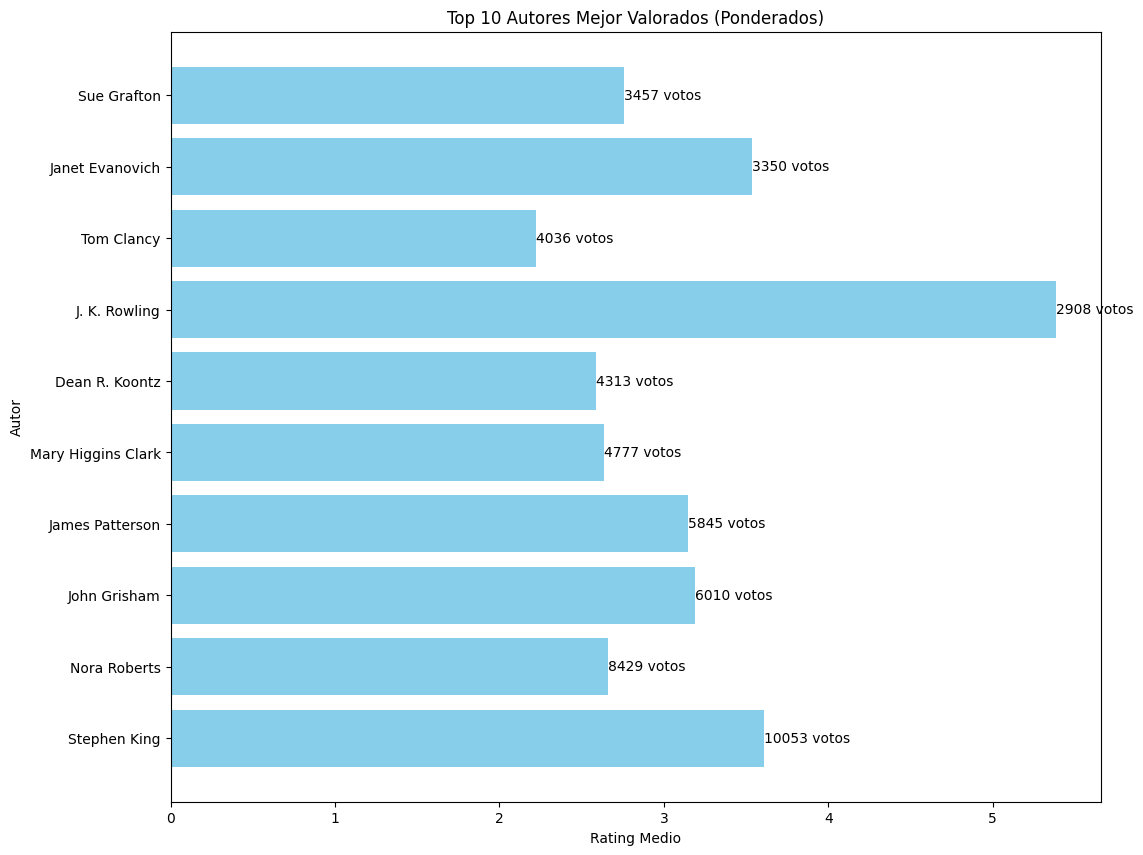

In [ ]:
## Teniendo en cuenta tanto el numero de votos como el rating:
# Peso a la calificación promedio y al número de votos. Rating 0-5; Votos~1000
weight_rating = 0.9979
weight_count = 0.0021

# Calculo el puntaje ponderado para cada autor
author_stats['weighted_score'] = (author_stats['mean'] * weight_rating) + (author_stats['count'] * weight_count)

# Autores ordenados según el puntaje ponderado
top_authors_weighted = author_stats.sort_values('weighted_score', ascending=False).head(10)

# Diagrama de barras horizontal
plt.figure(figsize=(12, 10))
bars = plt.barh(top_authors_weighted.index, top_authors_weighted['mean'], color='skyblue')

# Etiquetas de conteo de votos
for bar, count in zip(bars, top_authors_weighted['count']):
  plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} votos', va='center', ha='left')

plt.xlabel('Rating Medio')
plt.ylabel('Autor')
plt.title('Top 10 Autores Mejor Valorados (Ponderados)')
plt.show()

# 3.2

In [ ]:
df_newbooks = pd.read_csv(ruta_base + 'all_books.csv', delimiter=',')
df_goodreads = pd.read_csv(ruta_base + 'goodreads.csv', delimiter=',')

In [ ]:
df_newbooks.rename(columns={'year_first_published': 'Year', 'book_title': 'Title', 'author': 'Author', 'book_id': 'ISBN'}, inplace=True)
df_goodreads.rename(columns={'year_first_published': 'Year', 'book_title': 'Title', 'author': 'Author', 'book_id': 'ISBN'}, inplace=True)
df_allbooks = pd.concat([df_goodreads, df_newbooks], ignore_index=True)

In [ ]:
df_allbooks.tail(2)

,book_id_title,ISBN,cover_image_uri,Title,book_series,book_settings,book_characters,book_language,Year,authorlink,...,num_pages,format,genres,people_curr_read,peop_want_to_read,num_ratings,num_reviews,average_rating,rating_distribution,awards
7133,18090118-hotelles,18090118,https://images-na.ssl-images-amazon.com/images...,Hotelles,['La trilogie Hotel'],NaN,NaN,English,2013.0,https://www.goodreads.com/author/show/7127295....,...,586.0,Paperback,"['Romance', 'Erotica', 'Erotic Romance', 'Cont...",37,836,584,101,2.97,"{'5 Stars': 71, '4 Stars': 116, '3 Stars': 200...",[]
7134,24350893-the-next-sin,24350893,https://images-na.ssl-images-amazon.com/images...,The Next Sin,['The Sin Trilogy'],NaN,NaN,English,2015.0,https://www.goodreads.com/author/show/5228869....,...,228.0,Kindle Edition,"['Romance', 'Contemporary Romance', 'Romantic ...",618,991,5128,405,4.24,"{'5 Stars': 2305, '4 Stars': 1959, '3 Stars': ...",[]


In [ ]:
list(df_allbooks.columns)

['book_id_title',
 'ISBN',
 'cover_image_uri',
 'Title',
 'book_series',
 'book_settings',
 'book_characters',
 'book_language',
 'Year',
 'authorlink',
 'Author',
 'num_pages',
 'format',
 'genres',
 'people_curr_read',
 'peop_want_to_read',
 'num_ratings',
 'num_reviews',
 'average_rating',
 'rating_distribution',
 'awards']

In [ ]:
# Dataframe a usar
df = df_allbooks

## Este cambio de formato no funcionó

In [ ]:
# Convertir la columna 'rating_distribution' en diccionarios reales
df['rating_distribution'] = df['rating_distribution'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Expandir los diccionarios en columnas separadas
df_temp = df['rating_distribution'].apply(pd.Series)

# Concatenar el DataFrame original con el nuevo DataFrame de ratings
df = pd.concat([df, df_temp], axis=1)

# Eliminar la columna original 'rating_distribution'
df.drop(columns=['rating_distribution'], inplace=True)

df.tail(2)

,book_id_title,ISBN,cover_image_uri,Title,book_series,book_settings,book_characters,book_language,Year,authorlink,...,5 Stars,4 Stars,3 Stars,2 Stars,1 Star,5 Stars,4 Stars,3 Stars,2 Stars,1 Star
7133,18090118-hotelles,18090118,https://images-na.ssl-images-amazon.com/images...,Hotelles,['La trilogie Hotel'],NaN,NaN,English,2013.0,https://www.goodreads.com/author/show/7127295....,...,71,116,200,116,81,71,116,200,116,81
7134,24350893-the-next-sin,24350893,https://images-na.ssl-images-amazon.com/images...,The Next Sin,['The Sin Trilogy'],NaN,NaN,English,2015.0,https://www.goodreads.com/author/show/5228869....,...,2305,1959,705,118,41,2305,1959,705,118,41


In [ ]:
df['awards'].value_counts()

awards
[]                                                                                                                                                                                                                                                                                                                                                                                                             5131
['Goodreads Choice Award Nominee for Romance (2015)']                                                                                                                                                                                                                                                                                                                                                             8
['Goodreads Choice Award Nominee for Romance (2013)']                                                                                                                                    

In [ ]:
# Convertir las listas en la columna 'awards' de cadenas de texto a listas reales
df['awards'] = df['awards'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Crear una nueva columna con la cantidad de premios
df['num_awards'] = df['awards'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Mostrar una muestra del DataFrame para verificar
df[['Title','awards', 'num_awards']].head()

,Title,awards,num_awards
0,Harry Potter and the Half-Blood Prince,[Locus Award Nominee for Best Young Adult Nove...,4
1,Getting Home Alive,[],0
2,Journal 64,[De Gyldne Laurbaer (2010)],1
3,Clockwork Prince,"[Teen Buckeye Book Award Nominee (2012), Child...",2
4,The Wall,[],0


In [ ]:
# Definimos características del libro
features = ['book_series', 'book_language', 'Year', 'Author', 'num_pages', 'format', 'genres', 'people_curr_read', 'peop_want_to_read', 'num_ratings', 'num_reviews', 'average_rating', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars', 'num_awards']
X = df[features]
y = df['Title']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

# Identificamos las columnas numéricas y categóricas
numeric_features = ['Year', 'num_pages', 'people_curr_read',
                    'peop_want_to_read', 'num_ratings', 'num_reviews',
                    'average_rating', '5 Stars', '4 Stars', '3 Stars',
                    '2 Stars', '1 Star', 'num_awards']
categorical_features = ['book_series', 'book_language', 'Author', 'format', 'genres']

for col in numeric_features:
  # Cambiar k por tres zeros de miles. Cambiar m por seis zeros de millón. Cambiar comas decimales por puntos.
  X[col] = X[col].replace('m', '000000')
  X[col] = X[col].replace('k', '000')
  X[col] = X[col].replace(',', '.')
  X[col] = X[col].astype(float)

<ipython-input-105-d132b3d8b944>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].replace('m', '000000')
<ipython-input-105-d132b3d8b944>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].replace('k', '000')
<ipython-input-105-d132b3d8b944>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

ValueError: could not convert string to float: '45.9k'

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

# Identificamos las columnas numéricas y categóricas
numeric_features = ['Year', 'num_pages', 'people_curr_read',
                    'peop_want_to_read', 'num_ratings', 'num_reviews',
                    'average_rating', '5 Stars', '4 Stars', '3 Stars',
                    '2 Stars', '1 Star', 'num_awards']
categorical_features = ['book_series', 'book_language', 'Author', 'format', 'genres']

# 1. Convertir las columnas numéricas a cadenas (strings)
for col in numeric_features:
    if col != 'average_rating':
        X[col] = X[col].astype(str)

# 2. Reemplazar NaN con ceros
X.fillna(0, inplace=True)
X.replace([np.inf, -np.inf], 0, inplace=True)
X = X.astype(int)

# 3. Quitar las comas y convertir a enteros (excepto 'average_rating')
for col in numeric_features:
    if col != 'average_rating':
        X[col] = X[col].str.replace('k', 'e3').str.replace('m', 'e6').astype(float).astype(int)

# 4. Convertir 'average_rating' a float64
X['average_rating'] = X['average_rating'].str.replace(',', '.').astype(float)

X.tail()

<ipython-input-116-0e1e14411d49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-116-0e1e14411d49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-116-0e1e14411d49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

ValueError: invalid literal for int() with base 10: "['Harry Potter']"

## Este cambio de formato sí funcionó

In [ ]:
# Convertir la columna 'rating_distribution' en diccionarios reales
df['rating_distribution'] = df['rating_distribution'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Expandir los diccionarios en columnas separadas
df_temp = df['rating_distribution'].apply(pd.Series)

# Concatenar el DataFrame original con el nuevo DataFrame de ratings
df = pd.concat([df, df_temp], axis=1)

# Eliminar la columna original 'rating_distribution'
df.drop(columns=['rating_distribution'], inplace=True)

df.tail(2)

,book_id_title,ISBN,cover_image_uri,Title,book_series,book_settings,book_characters,book_language,Year,authorlink,...,peop_want_to_read,num_ratings,num_reviews,average_rating,awards,5 Stars,4 Stars,3 Stars,2 Stars,1 Star
7133,18090118-hotelles,18090118,https://images-na.ssl-images-amazon.com/images...,Hotelles,['La trilogie Hotel'],NaN,NaN,English,2013.0,https://www.goodreads.com/author/show/7127295....,...,836,584,101,2.97,[],71,116,200,116,81
7134,24350893-the-next-sin,24350893,https://images-na.ssl-images-amazon.com/images...,The Next Sin,['The Sin Trilogy'],NaN,NaN,English,2015.0,https://www.goodreads.com/author/show/5228869....,...,991,5128,405,4.24,[],2305,1959,705,118,41


In [ ]:
df['awards'].value_counts()

awards
[]                                                                                                                                                                                                                                                                                                                                                                                                             5131
['Goodreads Choice Award Nominee for Romance (2015)']                                                                                                                                                                                                                                                                                                                                                             8
['Goodreads Choice Award Nominee for Romance (2013)']                                                                                                                                    

In [ ]:
# Convertir las listas en la columna 'awards' de cadenas de texto a listas reales
df['awards'] = df['awards'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Crear una nueva columna con la cantidad de premios
df['num_awards'] = df['awards'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Mostrar una muestra del DataFrame para verificar
df[['Title','awards', 'num_awards']].head()

,Title,awards,num_awards
0,Harry Potter and the Half-Blood Prince,[Locus Award Nominee for Best Young Adult Nove...,4
1,Getting Home Alive,[],0
2,Journal 64,[De Gyldne Laurbaer (2010)],1
3,Clockwork Prince,"[Teen Buckeye Book Award Nominee (2012), Child...",2
4,The Wall,[],0


In [ ]:
# Definimos características del libro
features = ['book_series', 'book_language', 'Year', 'Author', 'num_pages', 'format', 'genres', 'people_curr_read', 'peop_want_to_read', 'num_ratings', 'num_reviews', 'average_rating', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars', 'num_awards']
X = df[features]
y = df['Title']

In [ ]:
X.columns

Index(['book_series', 'book_language', 'Year', 'Author', 'num_pages', 'format',
       'genres', 'people_curr_read', 'peop_want_to_read', 'num_ratings',
       'num_reviews', 'average_rating', '1 Star', '2 Stars', '3 Stars',
       '4 Stars', '5 Stars', 'num_awards'],
      dtype='object')

In [ ]:
# Identificamos las columnas numéricas y categóricas
numeric_features = ['Year', 'num_pages', 'people_curr_read',
                    'peop_want_to_read', 'num_ratings', 'num_reviews',
                    'average_rating', '5 Stars', '4 Stars', '3 Stars',
                    '2 Stars', '1 Star', 'num_awards']
categorical_features = ['book_series', 'book_language', 'Author', 'format', 'genres']

In [ ]:
# Función para cambiar el formato de las distintas caracteristicas
def standard_df(df):
    # Eliminamos los 'k' y 'm' de las columnas que las contienen
    df['people_curr_read'] = df['people_curr_read'].apply(lambda x: str(int(float(x.replace('k', '')) * 1000)) if isinstance(x, str) and 'k' in x else x)
    df['peop_want_to_read'] = df['peop_want_to_read'].apply(lambda x: str(int(float(x.replace('k', '')) * 1000)) if isinstance(x, str) and 'k' in x else x)

    df['people_curr_read'] = df['people_curr_read'].apply(lambda x: str(int(float(x.replace('m', '')) * 1000000)) if isinstance(x, str) and 'm' in x else x)
    df['peop_want_to_read'] = df['peop_want_to_read'].apply(lambda x: str(int(float(x.replace('m', '')) * 1000000)) if isinstance(x, str) and 'm' in x else x)

    #Eliminamos las ',' de los valores numericos
    df['people_curr_read'] = df['people_curr_read'].str.replace(',', '')
    df['peop_want_to_read'] = df['peop_want_to_read'].str.replace(',', '')

    #Cambiamos los '' por '0' y convertimos a entero
    df['people_curr_read'] = df['people_curr_read'].fillna('0')
    df['people_curr_read'] = df['people_curr_read'].replace('', '0')
    df['people_curr_read'] = df['people_curr_read'].astype('int64')

    df['peop_want_to_read'] = df['peop_want_to_read'].fillna('0')
    df['peop_want_to_read'] = df['peop_want_to_read'].replace('', '0')
    df['peop_want_to_read'] = df['peop_want_to_read'].astype('int64')

    df['num_pages'] = df['num_pages'].fillna('0')
    df['num_pages'] = df['num_pages'].replace('', '0')
    df['num_pages'] = df['num_pages'].astype('int64')

    df['Year'] = df['Year'].fillna('0')
    df['Year'] = df['Year'].replace('', '0')
    df['Year'] = df['Year'].astype('int64')

    # Convertimos las columnas de tipo string a un tipo numerico
    df['num_ratings'] = df['num_ratings'].astype('int64')
    df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

    # Separo en 5 columnas la columna de distribucion de ratings
    #df['5_Stars'] = df['rating_distribution'].apply(lambda x: x['5 Stars'])
    #df['4_Stars'] = df['rating_distribution'].apply(lambda x: x['4 Stars'])
    #df['3_Stars'] = df['rating_distribution'].apply(lambda x: x['3 Stars'])
    #df['2_Stars'] = df['rating_distribution'].apply(lambda x: x['2 Stars'])
    #df['1_Star'] = df['rating_distribution'].apply(lambda x: x['1 Star'])

    def es_lista(valor): # Validar si el libro pertenece a una serie o no
        return 1 if isinstance(valor, list) else 0
    df['book_series_flag'] = df['book_series'].apply(lambda x: es_lista(x))

    def obtener_primer_valor(valor): # Dejar unicamente el primer valor del genero
        if isinstance(valor, list):
            return valor[0] if valor else None
        else:
            return valor
    df['genres'] = df['genres'].apply(lambda x: obtener_primer_valor(x))

    # df['num_awards'] = df['awards'].apply(lambda x: contar_premios(x))

    # Eliminamos columnas que no usaremos mas
    #df = df.drop(columns=['book_series', 'book_settings', 'awards', 'rating_distribution', 'book_characters'])

    return df

In [ ]:
X_formatized = standard_df(X)

<ipython-input-143-32acc2c3a881>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_curr_read'] = df['people_curr_read'].apply(lambda x: str(int(float(x.replace('k', '')) * 1000)) if isinstance(x, str) and 'k' in x else x)
<ipython-input-143-32acc2c3a881>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peop_want_to_read'] = df['peop_want_to_read'].apply(lambda x: str(int(float(x.replace('k', '')) * 1000)) if isinstance(x, str) and 'k' in x else x)
<ipython-input-143-32acc2c3a881>:7: SettingWit

In [ ]:
# Llenar NaN con cadenas vacías para objetos y con ceros para valores numéricos
X_formatized = X_formatized.fillna({col: '' for col in X.select_dtypes(include='object').columns})
X_formatized = X_formatized.fillna({col: 0 for col in X.select_dtypes(include=np.number).columns})

# Creamos los transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Componemos el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline que incluye el preprocesamiento y el modelo KNN
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('knn', NearestNeighbors(n_neighbors=5, algorithm='auto'))])

# Entrenamos el modelo
pipeline.fit(X_formatized)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'num_pages',
                                                   'people_curr_read',
                                                   'peop_want_to_read',
                                                   'num_ratings', 'num_reviews',
                                                   'average_rating', '5 Stars',
                                                   '4 Stars', '3 Stars',
                                                   '2 Stars', '1 Star',
                                                   'num_awards']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_series',
                                                   'book_language', 'Author',
                                                   'format', 'genres'])])),
                ('knn', NearestNeighbors())])

In [ ]:
def recommend_books(pipeline, X, book_index=0):
    # Transformar el libro de entrada
    X_transformed = pipeline.named_steps['preprocessor'].transform(X)
    distances, indices = pipeline.named_steps['knn'].kneighbors(X_transformed[book_index].reshape(1, -1))
    recommendations = [y.iloc[i] for i in indices.flatten()]
    return recommendations

def delete_files(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"El archivo {file_path} ha sido eliminado correctamente.")
    else:
        print(f"El archivo {file_path} no existe.")

In [ ]:
import requests
from bs4 import BeautifulSoup
import sys
import re
import subprocess
import os
import shutil
def search_book(search_query):
    # Realizar la solicitud GET a la URL de búsqueda
    url = "https://www.goodreads.com/search"
    params = {
        "utf8": "✓",
        "q": search_query,
        "search_type": "books"
    }
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    response = requests.get(url, params=params, headers=headers)

    if response.status_code == 200:
        # Extraer el HTML de la respuesta
        html_content = response.text

        # Analizar el HTML con BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Encontrar el enlace del primer libro en el cuerpo del HTML
        book_link = soup.find('a', {'class': 'bookTitle'})

        if book_link and 'href' in book_link.attrs:
            book_id = re.search(r'/book/show/([^?]+)', book_link['href']).group(1)
            return book_id
    return None

In [ ]:
def get_book_info(base_path="/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/"):
  # Directorio donde están los archivos JSON
  json_dir = base_path + 'feat_book'

  datos_json = []

  # Iterar sobre todos los archivos en el directorio
  for filename in os.listdir(json_dir):
      if filename.endswith('.json'):  # Solo procesar archivos JSON
          ruta_completa = os.path.join(json_dir, filename)
          with open(ruta_completa, 'r') as archivo:
              try:
                  datos = json.load(archivo)
                  datos_json.append(datos)
              except Exception as e:
                  print(f"Error al cargar el archivo {filename}: {str(e)}")

  df_new = pd.DataFrame(datos_json)
  df_cleaned = standard_df(df_new)
  X = df_cleaned.drop(columns=['book_title'])

  return X

In [ ]:
book_index = 0
recommendations = recommend_books(pipeline, X_formatized, book_index)
print(recommendations[0:5])

['Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'The Fellowship of the Ring']


In [3]:
query = "A Court of Thornes and Roses"

html_content = search_book(query)
print(html_content)
base_path = "/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/"

with open(base_path + 'book.txt', 'w') as f:
    f.write(html_content)

args = ["python", base_path + "get_books.py", "--book_ids_path", base_path + "book.txt", "--output_directory_path", base_path + "feat_book"]
subprocess.run(args)
file_path = base_path + "feat_book/all_books.json"
delete_files(file_path)

book_features = get_book_info()

50659467-a-court-of-thorns-and-roses
El archivo /content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/feat_book/all_books.json ha sido eliminado correctamente.


In [4]:
book_index = 0
recommendations = recommend_books(pipeline, book_features, book_index)

print(recommendations[0])

The Seven Husbands of Evelyn Hugo


In [6]:
query = "Hamlet"

html_content = search_book(query)
print(html_content)
base_path = "/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/"

# Borrando contenido previo
delete_files(base_path + 'book.txt')

with open(base_path + 'book.txt', 'w') as f:
    f.write(html_content)

args = ["python", base_path + "get_books.py", "--book_ids_path", base_path + "book.txt", "--output_directory_path", base_path + "feat_book"]
subprocess.run(args)
file_path = base_path + "feat_book/all_books.json"
delete_files(file_path)

book_features = get_book_info()

1420.Hamlet
El archivo /content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/book.txt ha sido eliminado correctamente.
El archivo /content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/feat_book/all_books.json ha sido eliminado correctamente.


In [7]:
book_index = 0
recommendations = recommend_books(pipeline, book_features, book_index)
if recommendations[0] == query:
  print(recommendations[1])
else:
  print(recommendations[0])

Macbeth


In [10]:
query = "La apologia de Socrates"

html_content = search_book(query)
print(html_content)
base_path = "/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/"

# Borrando contenido previo
delete_files(base_path + 'book.txt')

with open(base_path + 'book.txt', 'w') as f:
    f.write(html_content)

args = ["python", base_path + "get_books.py", "--book_ids_path", base_path + "book.txt", "--output_directory_path", base_path + "feat_book"]
subprocess.run(args)
file_path = base_path + "feat_book/all_books.json"
delete_files(file_path)

book_features = get_book_info()

13278551-la-apolog-a-de-s-crates
El archivo /content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/book.txt ha sido eliminado correctamente.
El archivo /content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/feat_book/all_books.json ha sido eliminado correctamente.


In [11]:
book_index = 0
recommendations = recommend_books(pipeline, book_features, book_index)
if recommendations[0] == query:
  print(recommendations[1])
else:
  print(recommendations[0])

Gorgias


In [ ]:
!python /content/drive/MyDrive/Analitica_de_Datos/Caso3/get_books.py --book_ids_path "/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/" --output_directory_path  "/content/drive/MyDrive/BigData/Casos de analítica/Caso 3. Book Analysis/feat_book'

# Get Books and Get Books From List

In [ ]:
# GET BOOKS
import argparse
from datetime import datetime
import json
import os
import re
import time

from urllib.request import urlopen
from urllib.error import HTTPError
import bs4
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
# Explicit wait https://selenium-python.readthedocs.io/waits.html
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from unidecode import unidecode

def get_all_lists(soup):

    lists = []
    list_count_dict = {}

    if soup.find('a', text='More lists with this book...'):

        lists_url = soup.find('a', text='More lists with this book...')['href']

        source = urlopen('https://www.goodreads.com' + lists_url)
        soup = bs4.BeautifulSoup(source, 'lxml')
        lists += [' '.join(node.text.strip().split()) for node in soup.find_all('div', {'class': 'cell'})]

        i = 0
        while soup.find('a', {'class': 'next_page'}) and i <= 10:

            time.sleep(2)
            next_url = 'https://www.goodreads.com' + soup.find('a', {'class': 'next_page'})['href']
            source = urlopen(next_url)
            soup = bs4.BeautifulSoup(source, 'lxml')

            lists += [node.text for node in soup.find_all('div', {'class': 'cell'})]
            i += 1

        # Format lists text.
        for _list in lists:
            # _list_name = ' '.join(_list.split()[:-8])
            # _list_rank = int(_list.split()[-8][:-2])
            # _num_books_on_list = int(_list.split()[-5].replace(',', ''))
            # list_count_dict[_list_name] = _list_rank / float(_num_books_on_list)     # TODO: switch this back to raw counts
            _list_name = _list.split()[:-2][0]
            _list_count = int(_list.split()[-2].replace(',', ''))
            list_count_dict[_list_name] = _list_count

    return list_count_dict


def get_shelves(soup):
    # Find the element containing the number of people currently reading
    currently_reading_element = soup.find("div", class_="SocialSignalsSection__caption")
    print(currently_reading_element)
    if currently_reading_element:
        # Extract the text and clean it
        currently_reading_text = currently_reading_element.text.strip()
        print(currently_reading_text)
        # Extract the number of people currently reading using string manipulation
        currently_reading_count = currently_reading_text.split()[0]
        print("Number of people currently reading:", currently_reading_count)
        return currently_reading_count
    else:
        print("Currently reading signal not found.")
        return ""

def get_want_to(soup):
    # Find the element containing the number of people who want to read
    want_to_read_element = soup.find("div", {"data-testid": "toReadSignal"})
    print("TO READ SIGNAL")
    print(want_to_read_element)
    if want_to_read_element:
        # Extract the text and clean it
        want_to_read_text = want_to_read_element.text.strip()
        # Extract the number of people who want to read using string manipulation
        want_to_read_count = want_to_read_text.split()[0]
        print("Number of people who want to read:", want_to_read_count)
        return want_to_read_count
    else:
        print("Want to read signal not found.")
        return ""


def get_genres(soup):
    # Find the genres list
    genres_list_element = soup.find("div", {"data-testid": "genresList"})
    if genres_list_element:
        # Find all genre button elements
        genre_button_elements = genres_list_element.find_all("span", {"class": "BookPageMetadataSection__genreButton"})

        # Extract genre names
        genres = [genre_button.find("span", {"class": "Button__labelItem"}).text.strip() for genre_button in
                  genre_button_elements]

        # Print the genres
        print("Genres:", genres)
        return genres
    else:
        print("Genres list not found.")
        return ""


def get_series_name(soup):
    # Find the <dt> tag corresponding to the "Series" section
    series_dt = soup.find("dt", text="Series")

    # Check if the <dt> tag is found
    if series_dt:
        # Find the next <dd> tag after the <dt> tag
        series_dd = series_dt.find_next_sibling("dd")

        # Check if the <dd> tag is found and has text
        if series_dd and series_dd.text.strip():
            # Extract the series text from the <dd> tag
            series_text = series_dd.text.strip()

            # Extract the series names from the <a> tags within the <dd> tag
            series_names = [unidecode(a.text.strip()) for a in series_dd.find_all("a")]

            print("Series:", series_text)
            print("Series Names:", series_names)
            return series_names
        else:
            print("No series information found.")
            return ""
    else:
        print("No series section found.")
        return ""


def get_series_uri(soup):
    try:
        series = soup.find(id="bookSeries").find("a")
        series_uri = series.get("href")
        return series_uri
    except:
        return ""

def get_top_5_other_editions(soup):
    other_editions = []
    for div in soup.findAll('div', {'class': 'otherEdition'}):
      other_editions.append(div.find('a')['href'])
    return other_editions

def get_isbn(soup):
    try:
        isbn = re.findall(r'nisbn: [0-9]{10}' , str(soup))[0].split()[1]
        return isbn
    except:
        return "isbn not found"

def get_isbn13(soup):
    try:
        isbn13 = re.findall(r'nisbn13: [0-9]{13}' , str(soup))[0].split()[1]
        return isbn13
    except:
        return "isbn13 not found"


def get_rating_distribution(soup):
    # Encontrar todos los elementos del histograma de calificaciones
    rating_bars = soup.find_all("div", class_="RatingsHistogram__bar")

    # Recorrer los elementos y extraer los valores
    ratings_data = []
    for bar in rating_bars:
        total_ratings = int(bar.find("div", class_="RatingsHistogram__labelTotal").text.strip().split()[0].replace(',', ''))
        ratings_data.append((total_ratings))

    distribution_dict = {'5 Stars': ratings_data[0],
                         '4 Stars': ratings_data[1],
                         '3 Stars': ratings_data[2],
                         '2 Stars': ratings_data[3],
                         '1 Star':  ratings_data[4]}
    return distribution_dict


def get_num_pages(soup):
    pages_format_element = soup.find("p", {"data-testid": "pagesFormat"})

    if pages_format_element:
        pages_format_text = pages_format_element.text.strip()

        # Split the text based on comma separator
        pages_format_parts = pages_format_text.split(", ")

        # Extract pages and format separately
        if len(pages_format_parts) == 2:
            pages = pages_format_parts[0].split()[0]  # Extract the number of pages
            book_format = pages_format_parts[1]  # Extract the book format
            print("Pages:", pages)
            print("Format:", book_format)
            return pages, book_format
        else:
            return ["",""]
    else:
        return ["",""]


def get_year_first_published(soup):
    # Find the publication year
    publication_info_element = soup.find("p", {"data-testid": "publicationInfo"})
    if publication_info_element:
        publication_info = publication_info_element.text.strip()
        # Extract the publication year
        publication_year = publication_info.split()[-1]
        print("Publication Year:", publication_year)
        return publication_year
    else:
        return ""


def get_id(bookid):
    pattern = re.compile("([^.-]+)")
    return pattern.search(bookid).group()

def get_cover_image_uri(soup):
    series = soup.find('img', class_='ResponsiveImage')
    if series:
        series_uri = series.get('src')
        print(series_uri)
        return series_uri
    else:
        return ""

def espera(driver, tag, toPrint, extra_text = ""):
    try:
        if tag == 'id':
            element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.ID, toPrint)))
        elif (tag == 'xpath'):
            element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, toPrint)))
    except:
        # driver.quit()
        print('Driver timeout. Waiting for element >' + toPrint + '<' + extra_text)
        return -1


def espera_texto(driver, tag, toPrint, extra_text = ""):
    try:
        if tag == 'id':
            element = WebDriverWait(driver, 3).until(EC.text_to_be_present_in_element((By.ID, toPrint),'people'))
        elif (tag == 'xpath'):
            element = WebDriverWait(driver, 3).until(EC.text_to_be_present_in_element((By.XPATH, toPrint), 'people'))
    except:
        # driver.quit()
        print('Driver timeout. Waiting for element >' + toPrint + '<' + extra_text)
        return -1
def get_author_link(soup):
    author_link = soup.find("a", class_="ContributorLink")
    return author_link['href']

def get_author_name(soup):
    author_element = soup.find("span", class_="ContributorLink__name")
    return unidecode(author_element.text.strip())
def get_num_ratings(soup):
    print("Num ratings")
    ratings_element = soup.find("span", {"data-testid": "ratingsCount"})
    ratings_text = ratings_element.text.strip()
    # Extract digits from the ratings text
    num_reviews = ratings_text.split('\xa0')[0].replace(',','')
    print(num_reviews)
    return num_reviews

def get_num_reviews(soup):
    print("Num reviews")
    reviews_element = soup.find("span", {"data-testid": "reviewsCount"})
    reviews_text = reviews_element.text.strip()
    # Extract digits from the reviews text
    num_reviews = reviews_text.split('\xa0')[0].replace(',','')
    print(num_reviews)
    return int(num_reviews)

def get_average_rating(soup):
    print("Avg rating")
    avg_rating = soup.find("div", class_="RatingStatistics__rating")
    avg_rating_text = avg_rating.text.strip()
    print(avg_rating_text)
    return avg_rating_text

def get_awards(soup):
    award_spans = soup.find_all("span", {"data-testid": "award"})
    print(award_spans)
    list_awards = []
    if award_spans != None:
        # Iterate over each <span> tag to extract the award information
        for award_span in award_spans:
            # Extract the award text
            award_text = award_span.text.strip()
            #print("Award:", award_text)
            list_awards.append(unidecode(award_text))
        return list_awards
    else:
        return ""
def makeClick(driver, tag, elementToClick):
    success = 0
    attempts = 0
    while success == 0:
        try:
            if (espera(driver, tag, elementToClick) != -1):
                driver.find_element(tag, elementToClick).click()
                success = 1
            else:
                return -1
        except:
            success = 0
            attempts = attempts+1
    return attempts

def get_settings(soup):
    # Find the <dt> tag corresponding to the "Settings" section
    setting_dt = soup.find("dt", text="Setting")

    # Check if the <dt> tag is found
    if setting_dt:
        # Find the next <dd> tag after the <dt> tag
        setting_dd = setting_dt.find_next_sibling("dd")

        # Check if the <dd> tag is found and has text
        if setting_dd and setting_dd.text.strip():
            # Extract the series text from the <dd> tag
            setting_text = setting_dd.text.strip()

            # Extract the series names from the <a> tags within the <dd> tag
            setting_names = [unidecode(a.text.strip()) for a in setting_dd.find_all("a")]

            print("Settings:", setting_text)
            print("Settings names:", setting_names)
            return setting_names
        else:
            print("No setting information found.")
            return ""
    else:
        print("No setting section found.")
        return ""

def get_characters(soup):
    # Find the <dt> tag corresponding to the "Settings" section
    chars_dt = soup.find("dt", text="Characters")

    # Check if the <dt> tag is found
    if chars_dt:
        # Find the next <dd> tag after the <dt> tag
        chars_dd = chars_dt.find_next_sibling("dd")

        # Check if the <dd> tag is found and has text
        if chars_dd and chars_dd.text.strip():
            # Extract the series text from the <dd> tag
            chars_text = chars_dd.text.strip()

            # Extract the series names from the <a> tags within the <dd> tag
            chars_names = [unidecode(a.text.strip()) for a in chars_dd.find_all("a")]

            print("Characters:", chars_text)
            print("Character names:", chars_names)
            return chars_names
        else:
            print("No character information found.")
            return ""
    else:
        print("No character section found.")
        return ""

def get_language(soup):
    # Find the <dt> tag corresponding to the "Settings" section
    language_dt = soup.find("dt", text="Language")

    # Check if the <dt> tag is found
    if language_dt:
        # Find the next <dd> tag after the <dt> tag
        language_dd = language_dt.find_next_sibling("dd")
        # Check if the <dd> tag is found and has text
        if language_dd and language_dd.text.strip():
            # Extract the series text from the <dd> tag
            language_text = language_dd.text.strip()

            print("Language:", language_text)
            return unidecode(language_text)
        else:
            print("No Language information found.")
            return ""
    else:
        print("No language section found.")
        return ""
def get_title(soup):
    title_element = soup.find('h1', {'data-testid': 'bookTitle'})
    if title_element:
        return unidecode(' '.join(title_element.text.split()))
    else:
        return ""
def wait_popup(driver):
    # A veces sale un pop-up que hay que cerrar
    try:
        popup_window = WebDriverWait(driver, 3).until(
            EC.presence_of_element_located((By.XPATH, "/html/body/div[3]/div/div/div[2]")))
        popup_window2 = WebDriverWait(driver, 3).until(
            EC.presence_of_element_located((By.XPATH, "/html/body/div[3]/div/div[1]/div/div/button")))


        # Check if the pop-up window is displayed
        if popup_window.is_displayed():
            # Find the dismiss button inside the pop-up window
            dismiss_button = popup_window.find_element(By.XPATH, "/html/body/div[3]/div/div/div[1]/button")
            # Click on the dismiss button
            dismiss_button.click()
        # Check if the pop-up window is displayed
        if popup_window2.is_displayed():
            # Find the dismiss button inside the pop-up window
            dismiss_button2 = popup_window2.find_element(By.XPATH, "/html/body/div[3]/div/div[1]/div/div/button")
            # Click on the dismiss button
            dismiss_button2.click()
    except:
        pass
def scrape_book(book_id):
    chrome_options = Options()
    #chrome_options.add_argument("--headless")  # Enable headless mode
    driver = webdriver.Chrome(options=chrome_options)
    url = 'https://www.goodreads.com/book/show/' + book_id
    driver.get(url)
    wait_popup(driver)
    #If the book is not in Goodreads anymore, it will not have a title
    source = driver.page_source
    soup = bs4.BeautifulSoup(source, 'html.parser')
    title_element = soup.find('h1', {'data-testid': 'bookTitle'})
    if title_element == None:
        return -1
    wait_popup(driver)
    #Espero a que salga el botón de "Book detals & editions". Veo que a veces cambia de XPath
    espera(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[6]/div/div/button/span[1]', "Books details & editions 1")
    espera(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[7]/div/div/button/span[1]', "Books details & editions 2")
    attempts = makeClick(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[7]/div/div/button/span[1]')
    attempts = makeClick(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[6]/div/div/button/span[1]')
    wait_popup(driver)
    #Esperamos a que aparezcan los current_readings
    espera_texto(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[7]/div/div[1]/span/div[2]/div', "current_readings")
    espera_texto(driver, 'xpath', '//*[@id="__next"]/div[2]/main/div[1]/div[2]/div[2]/div[2]/div[7]/div/div[2]/span/div[2]/div', "current_readings2")
    wait_popup(driver)
    source = driver.page_source
    soup = bs4.BeautifulSoup(source, 'html.parser')
    wait_popup(driver)
    source = driver.page_source
    soup = bs4.BeautifulSoup(source, 'html.parser')



    return {'book_id_title':        book_id,
            'book_id':              get_id(book_id),
            'cover_image_uri':      get_cover_image_uri(soup),
            'book_title':           get_title(soup),
            "book_series":          get_series_name(soup),
            "book_settings":        get_settings(soup),
            "book_characters":      get_characters(soup),
            "book_language":        get_language(soup),
            #"book_series_uri":      get_series_uri(soup),
            #'top_5_other_editions': get_top_5_other_editions(soup),
            #'isbn':                 get_isbn(soup),
            #'isbn13':               get_isbn13(soup),
            'year_first_published': get_year_first_published(soup),
            'authorlink':           get_author_link(soup),
            'author':               get_author_name(soup),
            'num_pages':            get_num_pages(soup)[0],
            'format':               get_num_pages(soup)[1],
            'genres':               get_genres(soup),
            'people_curr_read':     get_shelves(soup),
            'peop_want_to_read':    get_want_to(soup),
            #'lists':                get_all_lists(soup),
            'num_ratings':          get_num_ratings(soup),
            'num_reviews':          get_num_reviews(soup),
            'average_rating':       get_average_rating(soup),
            'rating_distribution':  get_rating_distribution(soup),
            'awards':               get_awards(soup)}

def condense_books(books_directory_path):

    books = []

    # Look for all the files in the directory and if they contain "book-metadata," then load them all and condense them into a single file
    for file_name in os.listdir(books_directory_path):
        if file_name.endswith('.json') and not file_name.startswith('.') and file_name != "all_books.json" and "book-metadata" in file_name:
            _book = json.load(open(books_directory_path + '/' + file_name, 'r')) #, encoding='utf-8', errors='ignore'))
            books.append(_book)

    return books

def main():

    start_time = datetime.now()
    script_name = os.path.basename(__file__)

    parser = argparse.ArgumentParser()
    parser.add_argument('--book_ids_path', type=str, default = 'my_list_of_books.txt' ) # good_list_books.txt
    parser.add_argument('--output_directory_path', type=str, default = 'classic_book_metadata') # classic_book_metadata → eroticaBookList
    parser.add_argument('--format', type=str, action="store", default="csv",
                        dest="format", choices=["json", "csv"],
                        help="set file output format")
    args = parser.parse_args()

    book_ids              = [line.strip() for line in open(args.book_ids_path, 'r') if line.strip()]
    books_already_scraped =  [file_name.replace('_book-metadata.json', '') for file_name in os.listdir(args.output_directory_path) if file_name.endswith('.json') and not file_name.startswith('all_books')]
    books_to_scrape       = [book_id for book_id in book_ids if book_id not in books_already_scraped]
    condensed_books_path   = args.output_directory_path + '/all_books'

    no_encontrados = 0

    for i, book_id in enumerate(books_to_scrape):
        try:
            print(str(datetime.now()) + ' ' + script_name + ': Scraping ' + book_id + '...')
            print(str(datetime.now()) + ' ' + script_name + ': #' + str(i+1+len(books_already_scraped)) + ' out of ' + str(len(book_ids)) + ' books')

            book = scrape_book(book_id)
            #If it returns -1, it means that the book was not found
            if book != -1:
                # Add book metadata to file name to be more specific
                json.dump(book, open(args.output_directory_path + '/' + book_id + '_book-metadata.json', 'w'))
            else:
                print("Libro no encontrado!")
                no_encontrados +=1

            print('=============================')

        except HTTPError as e:
            print(e)
            exit(0)


    books = condense_books(args.output_directory_path)
    if args.format == 'json':
        json.dump(books, open(f"{condensed_books_path}.json", 'w'))
    elif args.format == 'csv':
        json.dump(books, open(f"{condensed_books_path}.json", 'w'))
        book_df = pd.read_json(f"{condensed_books_path}.json")
        book_df.to_csv(f"{condensed_books_path}.csv", index=False, encoding='utf-8')

    print(str(datetime.now()) + ' ' + script_name + f':\n\n🎉 Success! All book metadata scraped. 🎉\n\nMetadata files have been output to /{args.output_directory_path}\nGoodreads scraping run time = ⏰ ' + str(datetime.now() - start_time) + ' ⏰')
    print(str(no_encontrados) + "Books were not found")


if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'selenium'

In [ ]:
# GET BOOKS FROM LIST
import argparse
from datetime import datetime
import os

import bs4

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
# Explicit wait https://selenium-python.readthedocs.io/waits.html
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from unidecode import unidecode

def espera(driver, tag, toPrint):
    try:
        if tag == 'id':
            element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.ID, toPrint)))
        elif (tag == 'xpath'):
            element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, toPrint)))
    except:
        # driver.quit()
        #print('Driver timeout. Waiting for element >' + toPrint + '<')
        return -1

def get_titles(soup):
    titles = soup.find_all("a", class_="bookTitle", itemprop="url")
    # Recorrer los elementos y extraer los valores
    titles_array = []
    for value in titles:
        link = value["href"]
        titles_array.append(link)
    return titles_array


def main():
    list_titles = []
    start_time = datetime.now()
    script_name = os.path.basename(__file__)

    parser = argparse.ArgumentParser()
    parser.add_argument('--url_path', type=str, default = "https://www.goodreads.com/list/show/201106.Best_books_of_May_2024")  # Nombre de la web. Cambiar después de / por 42779.Hottest_Dirty_Talk_
    parser.add_argument('--output_directory_path', type=str, default= "my_list_of_books.txt") # Nombre de salida del proceso good_list_books.txt
    args = parser.parse_args()

    chrome_options = Options()
    driver = webdriver.Chrome(options=chrome_options)
    # driver = webdriver.Chrome()
    url = args.url_path
    driver.get(url)

    while True:
        #primero leemos los datos de una página
        while espera(driver, 'xpath', '//*[@id="all_votes"]/table/tbody/tr[1]/td[3]/a') == -1:
            pass
        source = driver.page_source
        soup = bs4.BeautifulSoup(source, 'html.parser')
        titles = get_titles(soup)
        for title in titles:
            list_titles.append(title.split('/book/show/')[1])
        print(str(len(list_titles)) +" titles in the list! 🎉")

        try:
            # Wait for the pop-up window to appear
            popup_window = WebDriverWait(driver, 1).until(
                EC.presence_of_element_located((By.XPATH, "/html/body/div[3]/div/div/div[2]")))

            # Check if the pop-up window is displayed
            if popup_window.is_displayed():
                # Find the dismiss button inside the pop-up window
                dismiss_button = popup_window.find_element(By.XPATH, "/html/body/div[3]/div/div/div[1]/button")
                # Click on the dismiss button
                dismiss_button.click()
        except:
            pass

        # Ahora clicamos el botón de next
        next_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "next_page")))

        if "disabled" not in next_button.get_attribute("class"):
            # Click on the next button
            next_button.click()

        else:
            # Break out of the loop if the next button is disabled
            break

    # Specify the output file path
    #file_path = "list_elements.txt"

    # Open the file in write mode
    with open(args.output_directory_path, "w") as file:
        # Write each element of the list to a separate line in the file
        for item in list_titles:
            file.write(item + "\n")

    print(
        str(datetime.now()) + ' ' + script_name + f':\n\n🎉 Success! All the books from the list have been scrapped. 🎉\n\nThe list has been stored to /{args.output_directory_path}\nGoodreads scraping run time = ⏰ ' + str(
            datetime.now() - start_time) + ' ⏰')


if __name__ == '__main__':
    main()
